## Uploading the data from database to pandas dataframe

In [4]:
import pandas as pd
import sqlite3

# Create your connection.
conn = sqlite3.connect('CurrentWeatherDB.db')

Givatayim_df = pd.read_sql_query("SELECT * FROM Weather", conn)

In [5]:
Givatayim_df.head()
# Dimensions of the data:
print('Dimensions of the data: {}'.format(Givatayim_df.shape))

Dimensions of the data: (3866, 9)


In [6]:
# Descriptive statistics of numerical columns
# Selection by position

Givatayim_df.iloc[:,1:8].describe()

,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg
count,3866.000000,3866.000000,3866.000000,3866.000000,3866.000000,3866.000000,3866.000000
mean,23.855274,23.241081,24.423464,1014.515520,67.698396,2.741236,139.698655
std,3.277865,3.107125,3.417887,2.356218,12.490538,1.770242,139.487439
min,15.710000,15.000000,16.000000,1007.000000,23.000000,0.500000,0.000000
25%,21.610000,21.000000,22.000000,1013.000000,58.000000,1.500000,0.000000
50%,23.930000,23.330000,24.440000,1015.000000,69.000000,2.100000,130.000000
75%,26.070000,25.560000,27.000000,1016.000000,78.000000,4.100000,290.000000
max,36.000000,36.000000,37.000000,1021.000000,94.000000,9.800000,360.000000


In [7]:
# convert dt to datetime
import datetime
dates_times = []
for i in range(0,Givatayim_df.shape[0]):
    dates_times.append(datetime.datetime.fromtimestamp(
            Givatayim_df.dt[i]
        ).strftime('%Y-%m-%d %H:%M:%S'))
    
print(dates_times)

['2020-10-08 22:08:08', '2020-10-08 22:43:18', '2020-10-08 23:40:26', '2020-10-08 23:40:41', '2020-10-08 23:45:17', '2020-10-09 00:00:21', '2020-10-09 00:14:59', '2020-10-09 00:30:24', '2020-10-09 00:40:41', '2020-10-09 00:59:58', '2020-10-09 01:15:04', '2020-10-09 01:26:41', '2020-10-09 01:45:17', '2020-10-09 01:59:37', '2020-10-09 02:15:17', '2020-10-09 02:30:17', '2020-10-09 02:45:05', '2020-10-09 03:00:22', '2020-10-09 03:10:41', '2020-10-09 03:30:17', '2020-10-09 03:45:17', '2020-10-09 04:00:17', '2020-10-09 04:15:02', '2020-10-09 04:30:18', '2020-10-09 04:45:17', '2020-10-09 05:00:17', '2020-10-09 05:10:41', '2020-10-09 05:30:04', '2020-10-09 05:45:18', '2020-10-09 06:00:20', '2020-10-09 06:11:26', '2020-10-09 06:30:17', '2020-10-09 06:45:16', '2020-10-09 06:58:18', '2020-10-09 07:15:04', '2020-10-09 07:27:00', '2020-10-09 07:43:04', '2020-10-09 08:00:05', '2020-10-09 08:15:17', '2020-10-09 08:30:06', '2020-10-09 08:40:38', '2020-10-09 08:56:12', '2020-10-09 09:12:47', '2020-10-0

In [8]:
Givatayim_df["human_date_time"]=dates_times
Givatayim_df.head()

,dt,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,name,human_date_time
0,1602184088,27.14,26.67,27.78,1012,65,0.5,0,Giv‘atayim,2020-10-08 22:08:08
1,1602186198,26.78,26.11,27.22,1011,65,2.1,90,Giv‘atayim,2020-10-08 22:43:18
2,1602189626,25.71,25.00,26.67,1011,65,1.0,0,Giv‘atayim,2020-10-08 23:40:26
3,1602189641,25.71,25.00,26.67,1011,65,1.0,0,Giv‘atayim,2020-10-08 23:40:41
4,1602189917,25.72,25.00,26.67,1011,65,1.0,0,Giv‘atayim,2020-10-08 23:45:17


In [9]:
# times = []
# for i in range(0,Givatayim_df.shape[0]):
#     times.append(datetime.datetime.fromtimestamp(
#             Givatayim_df.dt[i]
#         ).strftime('%Y-%m-%d'))
    
# print(times)

In [10]:
Givatayim_df[Givatayim_df.dt.diff()>=1800]
# df[df.Score > 80]


,dt,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,name,human_date_time
1,1602186198,26.78,26.11,27.22,1011,65,2.1,90,Giv‘atayim,2020-10-08 22:43:18
2,1602189626,25.71,25.00,26.67,1011,65,1.0,0,Giv‘atayim,2020-10-08 23:40:26
530,1602664217,27.14,26.67,28.00,1018,51,3.1,290,Giv‘atayim,2020-10-14 11:30:17
576,1602706517,24.28,23.89,25.00,1017,73,1.5,0,Giv‘atayim,2020-10-14 23:15:17
3241,1604817929,20.37,19.00,21.67,1014,77,1.0,0,Giv‘atayim,2020-11-08 08:45:29
3242,1604839376,24.64,24.44,25.00,1013,50,1.5,0,Giv‘atayim,2020-11-08 14:42:56
3851,1605426290,18.00,18.00,18.00,1016,82,3.1,170,Giv‘atayim,2020-11-15 09:44:50


In [11]:
# difference in seconds from first observation till the end
Givatayim_df['seconds_from_beggining'] = Givatayim_df.loc[1:, 'dt'] - Givatayim_df.at[0, 'dt']
Givatayim_df.head()

,dt,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,name,human_date_time,seconds_from_beggining
0,1602184088,27.14,26.67,27.78,1012,65,0.5,0,Giv‘atayim,2020-10-08 22:08:08,NaN
1,1602186198,26.78,26.11,27.22,1011,65,2.1,90,Giv‘atayim,2020-10-08 22:43:18,2110.0
2,1602189626,25.71,25.00,26.67,1011,65,1.0,0,Giv‘atayim,2020-10-08 23:40:26,5538.0
3,1602189641,25.71,25.00,26.67,1011,65,1.0,0,Giv‘atayim,2020-10-08 23:40:41,5553.0
4,1602189917,25.72,25.00,26.67,1011,65,1.0,0,Giv‘atayim,2020-10-08 23:45:17,5829.0


In [12]:
# difference in minutes from begginig to end
Givatayim_df['minutes_from_beggining'] = Givatayim_df.seconds_from_beggining/ 60
Givatayim_df.head()

,dt,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,name,human_date_time,seconds_from_beggining,minutes_from_beggining
0,1602184088,27.14,26.67,27.78,1012,65,0.5,0,Giv‘atayim,2020-10-08 22:08:08,NaN,NaN
1,1602186198,26.78,26.11,27.22,1011,65,2.1,90,Giv‘atayim,2020-10-08 22:43:18,2110.0,35.166667
2,1602189626,25.71,25.00,26.67,1011,65,1.0,0,Giv‘atayim,2020-10-08 23:40:26,5538.0,92.300000
3,1602189641,25.71,25.00,26.67,1011,65,1.0,0,Giv‘atayim,2020-10-08 23:40:41,5553.0,92.550000
4,1602189917,25.72,25.00,26.67,1011,65,1.0,0,Giv‘atayim,2020-10-08 23:45:17,5829.0,97.150000


In [13]:
# difference in hours from begginig to end
Givatayim_df['hours_from_beggining'] = Givatayim_df.seconds_from_beggining/ 3600
Givatayim_df.head()

,dt,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,name,human_date_time,seconds_from_beggining,minutes_from_beggining,hours_from_beggining
0,1602184088,27.14,26.67,27.78,1012,65,0.5,0,Giv‘atayim,2020-10-08 22:08:08,NaN,NaN,NaN
1,1602186198,26.78,26.11,27.22,1011,65,2.1,90,Giv‘atayim,2020-10-08 22:43:18,2110.0,35.166667,0.586111
2,1602189626,25.71,25.00,26.67,1011,65,1.0,0,Giv‘atayim,2020-10-08 23:40:26,5538.0,92.300000,1.538333
3,1602189641,25.71,25.00,26.67,1011,65,1.0,0,Giv‘atayim,2020-10-08 23:40:41,5553.0,92.550000,1.542500
4,1602189917,25.72,25.00,26.67,1011,65,1.0,0,Giv‘atayim,2020-10-08 23:45:17,5829.0,97.150000,1.619167


In [14]:
# difference in days from begginig to end
Givatayim_df['days_from_beggining'] = Givatayim_df.seconds_from_beggining/ 86400
Givatayim_df.head()

,dt,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,name,human_date_time,seconds_from_beggining,minutes_from_beggining,hours_from_beggining,days_from_beggining
0,1602184088,27.14,26.67,27.78,1012,65,0.5,0,Giv‘atayim,2020-10-08 22:08:08,NaN,NaN,NaN,NaN
1,1602186198,26.78,26.11,27.22,1011,65,2.1,90,Giv‘atayim,2020-10-08 22:43:18,2110.0,35.166667,0.586111,0.024421
2,1602189626,25.71,25.00,26.67,1011,65,1.0,0,Giv‘atayim,2020-10-08 23:40:26,5538.0,92.300000,1.538333,0.064097
3,1602189641,25.71,25.00,26.67,1011,65,1.0,0,Giv‘atayim,2020-10-08 23:40:41,5553.0,92.550000,1.542500,0.064271
4,1602189917,25.72,25.00,26.67,1011,65,1.0,0,Giv‘atayim,2020-10-08 23:45:17,5829.0,97.150000,1.619167,0.067465


In [15]:
# adding a column of day or night - for simplicity day is 5:00-17:00, night is 18:00-04:00
SQL_Query = pd.read_sql_query(
'''SELECT *, CASE
           WHEN hour >= 0 and hour < 5 THEN 'Night' 
			WHEN hour >= 5 and hour <= 17 THEN 'Day' 
			WHEN hour > 17 THEN 'Night'
       END day_night from (
	SELECT dt,CAST(strftime('%H', dt, 'unixepoch','localtime') as INTEGER) as hour from Weather
);''', conn)

# print(SQL_Query)
Givatayim_df = Givatayim_df.merge(SQL_Query,on='dt',how='left')
Givatayim_df.head()

,dt,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,name,human_date_time,seconds_from_beggining,minutes_from_beggining,hours_from_beggining,days_from_beggining,hour,day_night
0,1602184088,27.14,26.67,27.78,1012,65,0.5,0,Giv‘atayim,2020-10-08 22:08:08,NaN,NaN,NaN,NaN,22,Night
1,1602186198,26.78,26.11,27.22,1011,65,2.1,90,Giv‘atayim,2020-10-08 22:43:18,2110.0,35.166667,0.586111,0.024421,22,Night
2,1602189626,25.71,25.00,26.67,1011,65,1.0,0,Giv‘atayim,2020-10-08 23:40:26,5538.0,92.300000,1.538333,0.064097,23,Night
3,1602189641,25.71,25.00,26.67,1011,65,1.0,0,Giv‘atayim,2020-10-08 23:40:41,5553.0,92.550000,1.542500,0.064271,23,Night
4,1602189917,25.72,25.00,26.67,1011,65,1.0,0,Giv‘atayim,2020-10-08 23:45:17,5829.0,97.150000,1.619167,0.067465,23,Night


In [16]:
# adding a column of Date
SQL_Query_date = pd.read_sql_query(
'''SELECT dt,CAST(strftime('%Y-%m-%d', dt, 'unixepoch') as TEXT) as Date from Weather;
''', conn)
Givatayim_df = Givatayim_df.merge(SQL_Query_date,on='dt',how='left')
Givatayim_df.head()

,dt,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,name,human_date_time,seconds_from_beggining,minutes_from_beggining,hours_from_beggining,days_from_beggining,hour,day_night,Date
0,1602184088,27.14,26.67,27.78,1012,65,0.5,0,Giv‘atayim,2020-10-08 22:08:08,NaN,NaN,NaN,NaN,22,Night,2020-10-08
1,1602186198,26.78,26.11,27.22,1011,65,2.1,90,Giv‘atayim,2020-10-08 22:43:18,2110.0,35.166667,0.586111,0.024421,22,Night,2020-10-08
2,1602189626,25.71,25.00,26.67,1011,65,1.0,0,Giv‘atayim,2020-10-08 23:40:26,5538.0,92.300000,1.538333,0.064097,23,Night,2020-10-08
3,1602189641,25.71,25.00,26.67,1011,65,1.0,0,Giv‘atayim,2020-10-08 23:40:41,5553.0,92.550000,1.542500,0.064271,23,Night,2020-10-08
4,1602189917,25.72,25.00,26.67,1011,65,1.0,0,Giv‘atayim,2020-10-08 23:45:17,5829.0,97.150000,1.619167,0.067465,23,Night,2020-10-08


In [17]:
# adding a column of Month
SQL_Query_date = pd.read_sql_query(
'''SELECT dt,CAST(strftime('%m', dt, 'unixepoch','localtime') as INTEGER) as Month from Weather;
''', conn)
Givatayim_df = Givatayim_df.merge(SQL_Query_date,on='dt',how='left')
Givatayim_df.head()

,dt,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,name,human_date_time,seconds_from_beggining,minutes_from_beggining,hours_from_beggining,days_from_beggining,hour,day_night,Date,Month
0,1602184088,27.14,26.67,27.78,1012,65,0.5,0,Giv‘atayim,2020-10-08 22:08:08,NaN,NaN,NaN,NaN,22,Night,2020-10-08,10
1,1602186198,26.78,26.11,27.22,1011,65,2.1,90,Giv‘atayim,2020-10-08 22:43:18,2110.0,35.166667,0.586111,0.024421,22,Night,2020-10-08,10
2,1602189626,25.71,25.00,26.67,1011,65,1.0,0,Giv‘atayim,2020-10-08 23:40:26,5538.0,92.300000,1.538333,0.064097,23,Night,2020-10-08,10
3,1602189641,25.71,25.00,26.67,1011,65,1.0,0,Giv‘atayim,2020-10-08 23:40:41,5553.0,92.550000,1.542500,0.064271,23,Night,2020-10-08,10
4,1602189917,25.72,25.00,26.67,1011,65,1.0,0,Giv‘atayim,2020-10-08 23:45:17,5829.0,97.150000,1.619167,0.067465,23,Night,2020-10-08,10


In [18]:
# convert categirial day_night to dummies (1,0)
day_night_dummy = pd.get_dummies(Givatayim_df['day_night'],drop_first=False)
print(day_night_dummy)
Givatayim_df = Givatayim_df.merge(day_night_dummy, left_index = True, right_index = True)
Givatayim_df.head()

      Day  Night
0       0      1
1       0      1
2       0      1
3       0      1
4       0      1
...   ...    ...
5639    1      0
5640    1      0
5641    1      0
5642    1      0
5643    1      0

[5644 rows x 2 columns]


,dt,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,name,human_date_time,seconds_from_beggining,minutes_from_beggining,hours_from_beggining,days_from_beggining,hour,day_night,Date,Month,Day,Night
0,1602184088,27.14,26.67,27.78,1012,65,0.5,0,Giv‘atayim,2020-10-08 22:08:08,NaN,NaN,NaN,NaN,22,Night,2020-10-08,10,0,1
1,1602186198,26.78,26.11,27.22,1011,65,2.1,90,Giv‘atayim,2020-10-08 22:43:18,2110.0,35.166667,0.586111,0.024421,22,Night,2020-10-08,10,0,1
2,1602189626,25.71,25.00,26.67,1011,65,1.0,0,Giv‘atayim,2020-10-08 23:40:26,5538.0,92.300000,1.538333,0.064097,23,Night,2020-10-08,10,0,1
3,1602189641,25.71,25.00,26.67,1011,65,1.0,0,Giv‘atayim,2020-10-08 23:40:41,5553.0,92.550000,1.542500,0.064271,23,Night,2020-10-08,10,0,1
4,1602189917,25.72,25.00,26.67,1011,65,1.0,0,Giv‘atayim,2020-10-08 23:45:17,5829.0,97.150000,1.619167,0.067465,23,Night,2020-10-08,10,0,1


## Visualizations 

In [19]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

#### A simple visualization

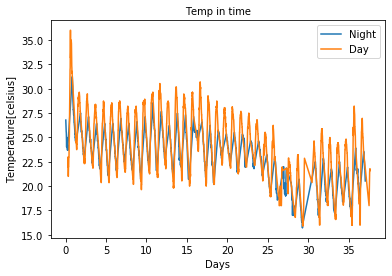

In [20]:
# plt.plot(Givatayim_df.seconds_from_beggining, Givatayim_df.temp,'b', markersize = 1)
# plt.plot(Givatayim_df.hours_from_beggining, Givatayim_df.temp,'b', markersize = 1)
sns.lineplot(data=Givatayim_df, x='days_from_beggining', y='temp', hue='day_night')

plt.title('Temp in time', fontsize = 10)
plt.xlabel('Days')
plt.ylabel('Temperature[celsius]')

plt.legend(['Night','Day'])
plt.show()

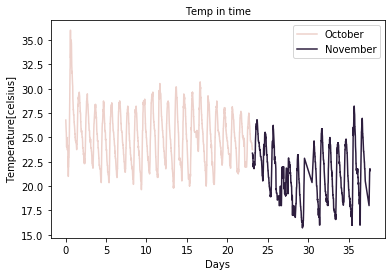

In [21]:
sns.lineplot(data=Givatayim_df, x='days_from_beggining', y='temp', hue='Month')

plt.title('Temp in time', fontsize = 10)
plt.xlabel('Days')
plt.ylabel('Temperature[celsius]')

plt.legend(['October','November'])
plt.show()

#### More than one plot

Text(0, 0.5, 'Temperature[celsius]')

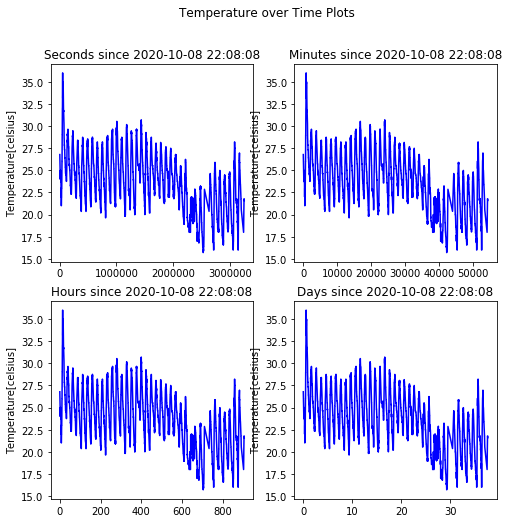

In [22]:
#Define the figure and the axes
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (8,8))
fig.suptitle('Temperature over Time Plots')

ax[0,0].plot(Givatayim_df.seconds_from_beggining, Givatayim_df.temp,'b', markersize = 1)
ax[0,0].set_title('Seconds since 2020-10-08 22:08:08')
ax[0,0].set_ylabel('Temperature[celsius]')
ax[0,1].plot(Givatayim_df.minutes_from_beggining, Givatayim_df.temp,'b', markersize = 1)
ax[0,1].set_title('Minutes since 2020-10-08 22:08:08')
ax[0,1].set_ylabel('Temperature[celsius]')

ax[1,0].plot(Givatayim_df.hours_from_beggining, Givatayim_df.temp,'b', markersize = 1)
ax[1,0].set_title('Hours since 2020-10-08 22:08:08')
ax[1,0].set_ylabel('Temperature[celsius]')

ax[1,1].plot(Givatayim_df.days_from_beggining, Givatayim_df.temp,'b', markersize = 1)
ax[1,1].set_title('Days since 2020-10-08 22:08:08')
ax[1,1].set_ylabel('Temperature[celsius]')


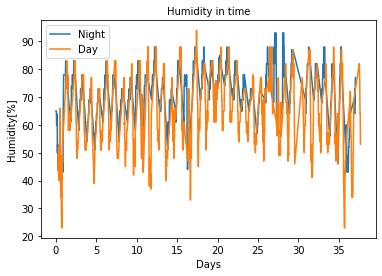

In [23]:
sns.lineplot(data=Givatayim_df, x='days_from_beggining', y='humidity', hue='day_night')

plt.title('Humidity in time', fontsize = 10)
plt.xlabel('Days')
plt.ylabel('Humidity[%]')

plt.legend(['Night','Day'])
plt.show()

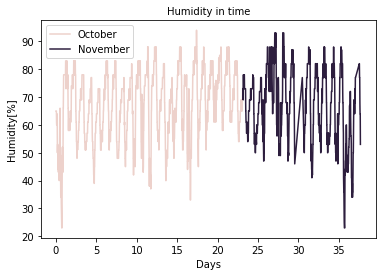

In [24]:
sns.lineplot(data=Givatayim_df, x='days_from_beggining', y='humidity', hue='Month')

plt.title('Humidity in time', fontsize = 10)
plt.xlabel('Days')
plt.ylabel('Humidity[%]')

plt.legend(['October','November'])
plt.show()

Text(0, 0.5, 'Humidity[%]')

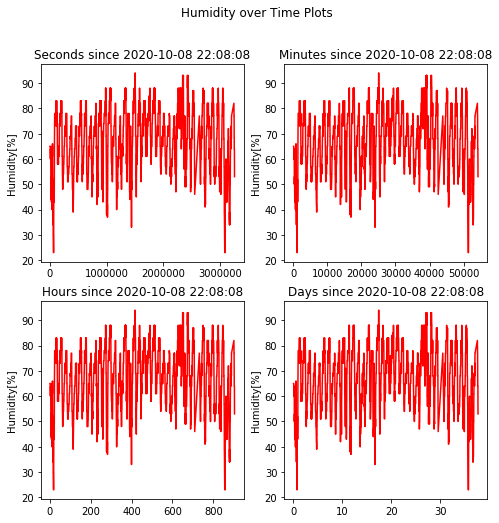

In [25]:
#Define the figure and the axes
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (8,8))
fig.suptitle('Humidity over Time Plots')

ax[0,0].plot(Givatayim_df.seconds_from_beggining, Givatayim_df.humidity,'r', markersize = 1)
ax[0,0].set_title('Seconds since 2020-10-08 22:08:08')
ax[0,0].set_ylabel('Humidity[%]')
ax[0,1].plot(Givatayim_df.minutes_from_beggining, Givatayim_df.humidity,'r', markersize = 1)
ax[0,1].set_title('Minutes since 2020-10-08 22:08:08')
ax[0,1].set_ylabel('Humidity[%]')

ax[1,0].plot(Givatayim_df.hours_from_beggining, Givatayim_df.humidity,'r', markersize = 1)
ax[1,0].set_title('Hours since 2020-10-08 22:08:08')
ax[1,0].set_ylabel('Humidity[%]')

ax[1,1].plot(Givatayim_df.days_from_beggining, Givatayim_df.humidity,'r', markersize = 1)
ax[1,1].set_title('Days since 2020-10-08 22:08:08')
ax[1,1].set_ylabel('Humidity[%]')


Text(0, 0.5, 'Pressure[hPa]')

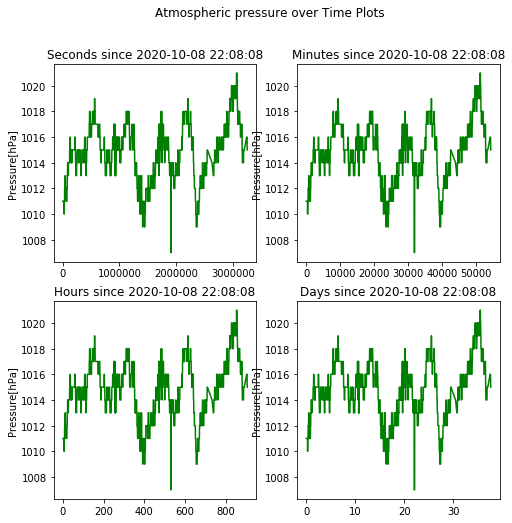

In [26]:
# Atmospheric pressure (on the sea level), hPa
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (8,8))
fig.suptitle('Atmospheric pressure over Time Plots')

ax[0,0].plot(Givatayim_df.seconds_from_beggining, Givatayim_df.pressure,'g', markersize = 1)
ax[0,0].set_title('Seconds since 2020-10-08 22:08:08')
ax[0,0].set_ylabel('Pressure[hPa]')
ax[0,1].plot(Givatayim_df.minutes_from_beggining, Givatayim_df.pressure,'g', markersize = 1)
ax[0,1].set_title('Minutes since 2020-10-08 22:08:08')
ax[0,1].set_ylabel('Pressure[hPa]')

ax[1,0].plot(Givatayim_df.hours_from_beggining, Givatayim_df.pressure,'g', markersize = 1)
ax[1,0].set_title('Hours since 2020-10-08 22:08:08')
ax[1,0].set_ylabel('Pressure[hPa]')

ax[1,1].plot(Givatayim_df.days_from_beggining, Givatayim_df.pressure,'g', markersize = 1)
ax[1,1].set_title('Days since 2020-10-08 22:08:08')
ax[1,1].set_ylabel('Pressure[hPa]')


#### Scatter plot

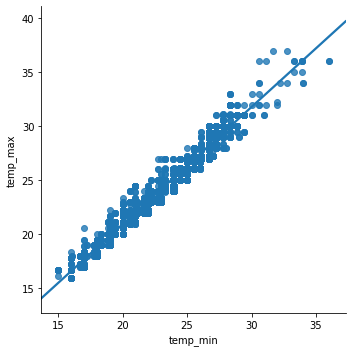

In [27]:
sns.lmplot(x='temp_min', y='temp_max', data=Givatayim_df)
# the blue line is the regression line

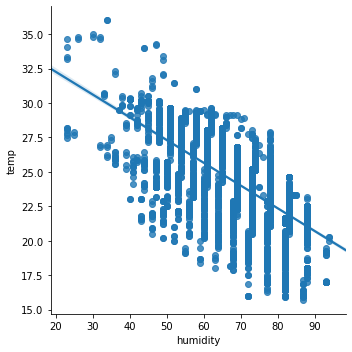

In [28]:
sns.lmplot(x='humidity', y='temp', data=Givatayim_df)
# the blue line is the regression line

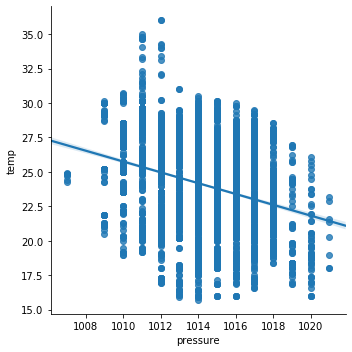

In [29]:
sns.lmplot(x='pressure', y='temp', data=Givatayim_df)
# the blue line is the regression line

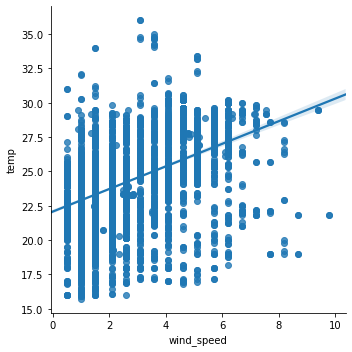

In [30]:
sns.lmplot(x='wind_speed', y='temp', data=Givatayim_df)
# the blue line is the regression line

In [31]:
# adding a third dimension looks a bit weird 
# sns.lmplot(x='temp_min', y='temp_max', data=Givatayim_df,
#            fit_reg=False, # No regression line
#            hue='dt')   # Color by dt

[(0, 125)]

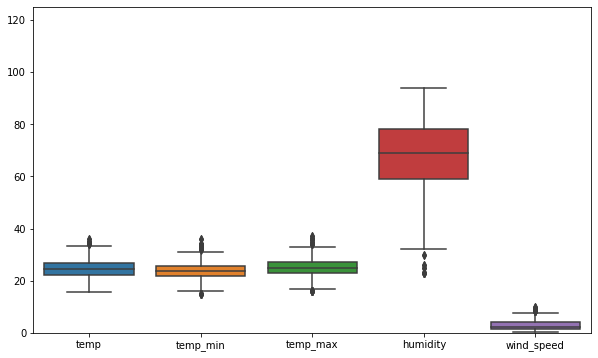

In [32]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(data=Givatayim_df[['temp','temp_min','temp_max','humidity','wind_speed']])
ax.set(ylim=(0, 125))

#### Overlaying

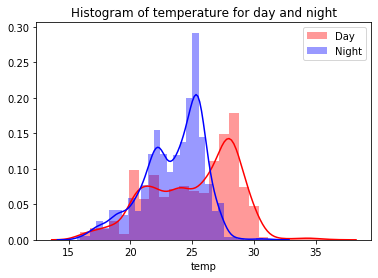

In [33]:
# histogram article - https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0
# bin size is according to the range of temps: min 18.9~17, max 36.
# Divided by 0.5 so that we can see small changes with smaller bins
# sns.distplot(Givatayim_df['temp'],color='blue',bins = int(19/0.5))
# sns.distplot(Givatayim_df['Night'],color='red',bins = int(19/0.5))
sns.distplot(Givatayim_df['temp'].loc[Givatayim_df['Day'] == 1], hist=True,color='r')
sns.distplot(Givatayim_df['temp'].loc[Givatayim_df['Night'] == 1], hist=True,color='b')
plt.title('Histogram of temperature for day and night')
plt.legend(['Day','Night'])

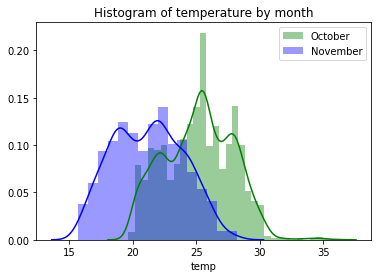

In [34]:
sns.distplot(Givatayim_df['temp'].loc[Givatayim_df['Month'] == 10], hist=True,color='g')
sns.distplot(Givatayim_df['temp'].loc[Givatayim_df['Month'] == 11], hist=True,color='b')
plt.title('Histogram of temperature by month')
plt.legend(['October','November'])

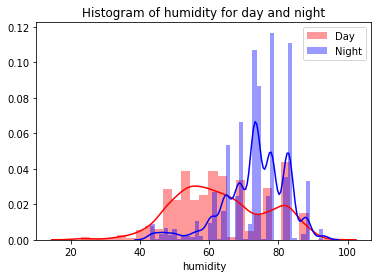

In [35]:
sns.distplot(Givatayim_df['humidity'].loc[Givatayim_df['Day'] == 1], hist=True,color='r')
sns.distplot(Givatayim_df['humidity'].loc[Givatayim_df['Night'] == 1], hist=True,color='b')
plt.title('Histogram of humidity for day and night')
plt.legend(['Day','Night'])

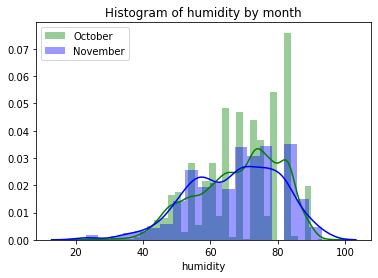

In [36]:
sns.distplot(Givatayim_df['humidity'].loc[Givatayim_df['Month'] == 10], hist=True,color='g')
sns.distplot(Givatayim_df['humidity'].loc[Givatayim_df['Month'] == 11], hist=True,color='b')
plt.title('Histogram of humidity by month')
plt.legend(['October','November'])

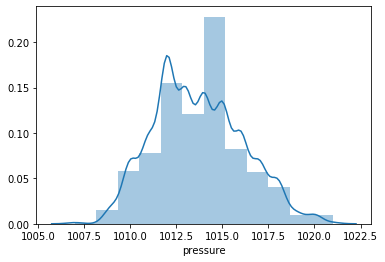

In [37]:
# bin size is according to the range of pressure: min 1007, max 1019
sns.distplot(Givatayim_df['pressure'],bins = int(12/1))
plt.show()

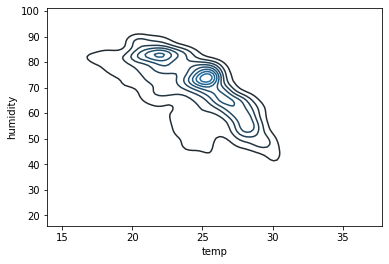

In [38]:
sns.kdeplot(Givatayim_df['temp'], Givatayim_df['humidity'])
plt.show()

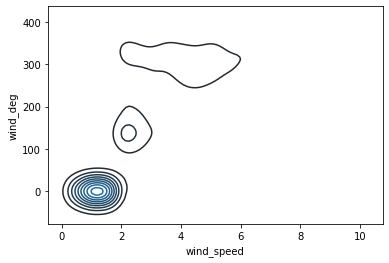

In [39]:
sns.kdeplot(Givatayim_df['wind_speed'], Givatayim_df['wind_deg'])
plt.show()

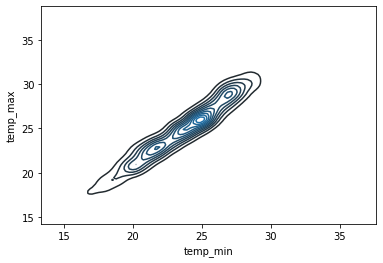

In [40]:
sns.kdeplot(Givatayim_df['temp_min'], Givatayim_df['temp_max'])
plt.show()

Text(5, 5, 'Day')

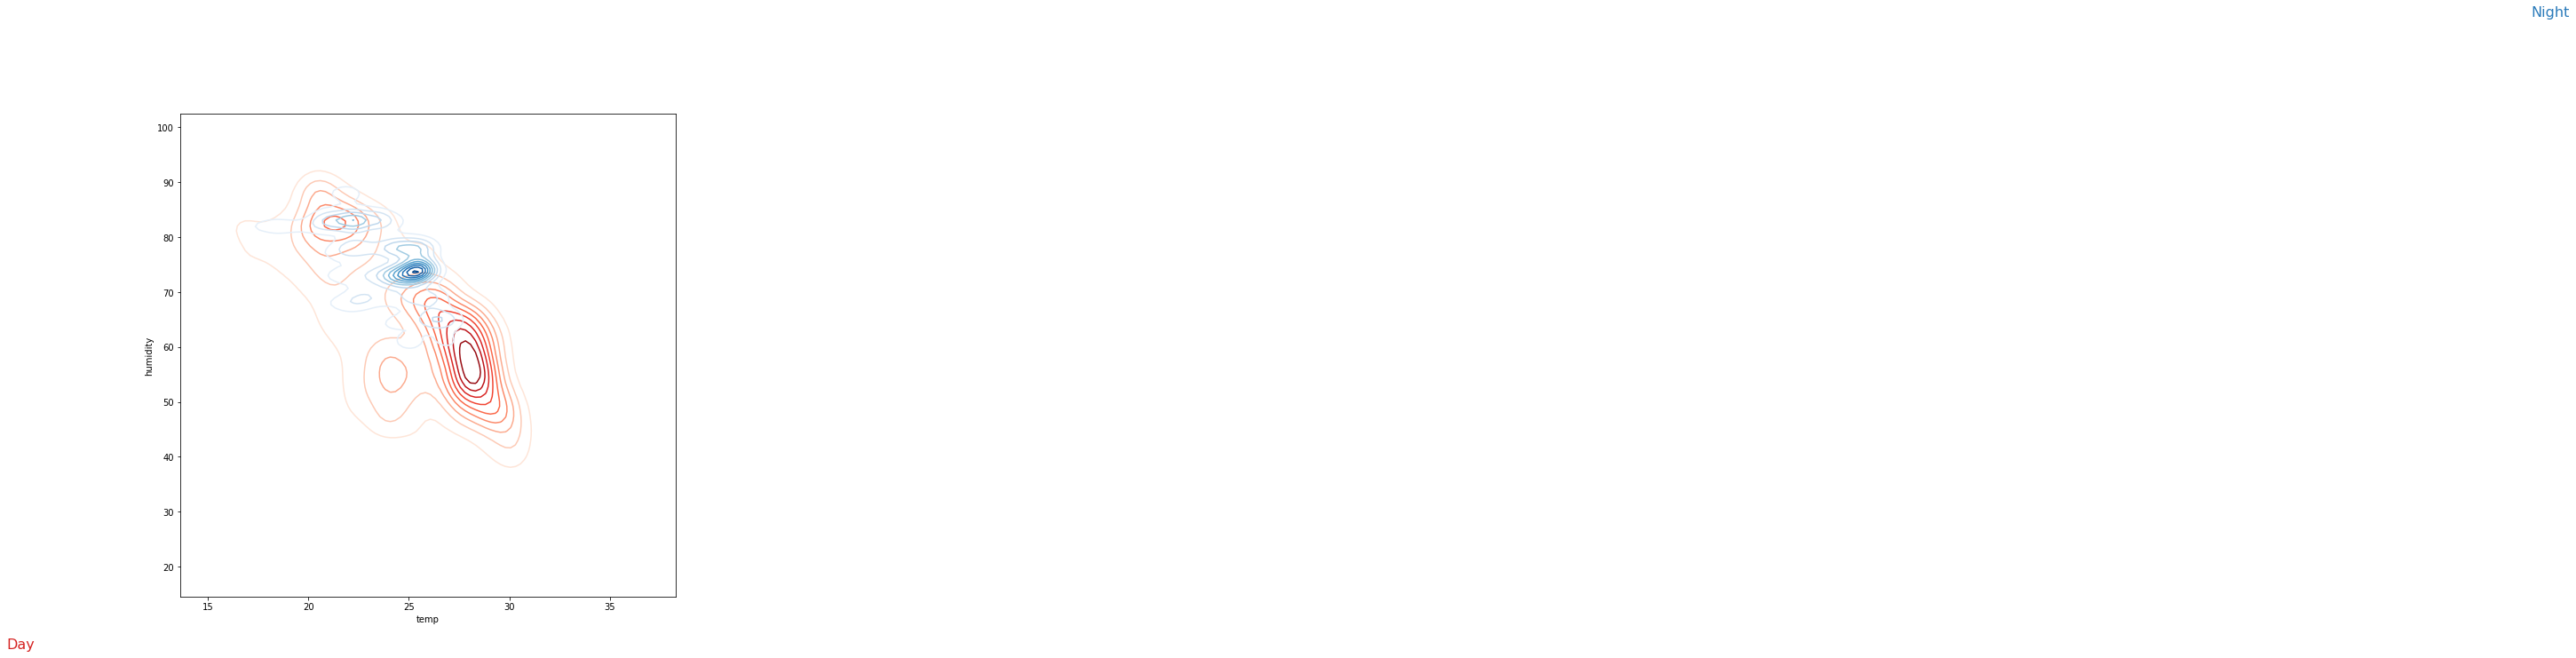

In [41]:
plt.figure(figsize=(10,10))
ax = sns.kdeplot(Givatayim_df['temp'].loc[Givatayim_df['Day'] == 1], Givatayim_df['humidity'].loc[Givatayim_df['Day'] == 1],
                 cmap="Reds", shade=False, shade_lowest=False)
ax = sns.kdeplot(Givatayim_df['temp'].loc[Givatayim_df['Night'] == 1], Givatayim_df['humidity'].loc[Givatayim_df['Night'] == 1],
                 cmap="Blues", shade=False, shade_lowest=False)

red = sns.color_palette("Reds")[-2]
blue = sns.color_palette("Blues")[-2]
ax.text(130.5, 120.2,"Night", size=16, color=blue)
ax.text(5,5,"Day", size=16, color=red)

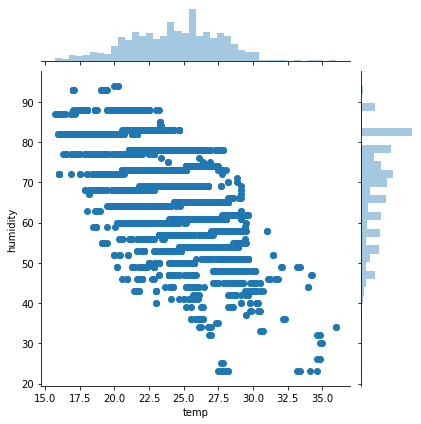

In [42]:
sns.jointplot(x='temp', y='humidity', data=Givatayim_df)
plt.show()

                temp  humidity  pressure  wind_speed  wind_deg       Day  \
temp        1.000000 -0.651767 -0.300050    0.443911  0.523897  0.263872   
humidity   -0.651767  1.000000  0.048102   -0.460506 -0.426126 -0.409167   
pressure   -0.300050  0.048102  1.000000   -0.228185 -0.167686 -0.012036   
wind_speed  0.443911 -0.460506 -0.228185    1.000000  0.765963  0.275976   
wind_deg    0.523897 -0.426126 -0.167686    0.765963  1.000000  0.230458   
Day         0.263872 -0.409167 -0.012036    0.275976  0.230458  1.000000   
Night      -0.263872  0.409167  0.012036   -0.275976 -0.230458 -1.000000   

               Night  
temp       -0.263872  
humidity    0.409167  
pressure    0.012036  
wind_speed -0.275976  
wind_deg   -0.230458  
Day        -1.000000  
Night       1.000000  


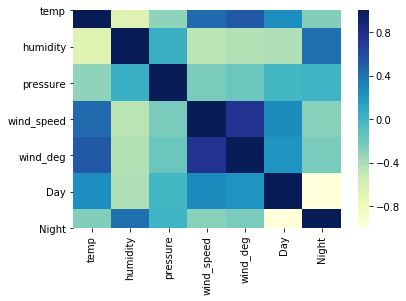

In [43]:
# Calculate correlations
corr = Givatayim_df[['temp','humidity', 'pressure', 'wind_speed', 'wind_deg', 'Day','Night']].corr()
print(corr)
# Heatmap
sns.heatmap(corr,cmap="YlGnBu")
plt.show()

In [44]:
grouped_Givatayim_by_date = Givatayim_df.groupby('Date')
# for key, value in grouped_Givatayim_by_date:
#     print(key)#, value)
print(grouped_Givatayim_by_date.temp.mean())

Date
2020-10-08    25.148824
2020-10-09    28.027320
2020-10-10    26.301895
2020-10-11    25.572813
2020-10-12    24.857500
2020-10-13    24.461771
2020-10-14    24.667021
2020-10-15    25.105000
2020-10-16    24.419688
2020-10-17    24.340000
2020-10-18    24.710938
2020-10-19    25.502604
2020-10-20    25.651667
2020-10-21    25.098021
2020-10-22    24.835876
2020-10-23    24.945600
2020-10-24    25.497680
2020-10-25    26.050235
2020-10-26    24.805302
2020-10-27    24.484381
2020-10-28    24.956042
2020-10-29    24.727813
2020-10-30    24.531146
2020-10-31    24.410103
2020-11-01    24.160632
2020-11-02    22.773542
2020-11-03    21.716289
2020-11-04    19.656526
2020-11-05    20.427813
2020-11-06    19.226250
2020-11-07    17.600000
2020-11-08    21.389565
2020-11-09    21.206875
2020-11-10    20.928229
2020-11-11    20.808542
2020-11-12    20.956667
2020-11-13    21.876250
2020-11-14    22.082262
2020-11-15    20.424667
Name: temp, dtype: float64


## Statistics

#### mean

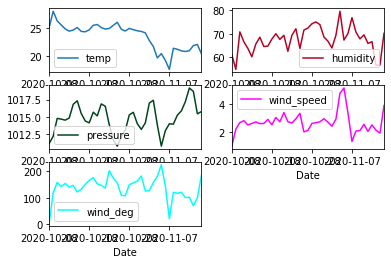

In [45]:
grouped_Givatayim_by_date = Givatayim_df.groupby('Date')

fig = plt.figure()
# Divide the figure into a 3x1 grid, and give me the first section
ax1 = fig.add_subplot(321)
# Divide the figure into a 3x1 grid, and give me the second section
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)


grouped_Givatayim_by_date_mean = grouped_Givatayim_by_date.mean()
# average temp per date
grouped_Givatayim_by_date_mean.temp.plot(ax=ax1,legend=True)
# average humidity per date
grouped_Givatayim_by_date_mean.humidity.plot(ax=ax2,colormap='coolwarm_r',legend=True)
# average pressure per date
grouped_Givatayim_by_date_mean.pressure.plot(ax=ax3,colormap='Greens_r',legend=True)
# average wind speed per date
grouped_Givatayim_by_date_mean.wind_speed.plot(ax=ax4,colormap='spring',legend=True)
# average wind degrees per date
grouped_Givatayim_by_date_mean.wind_deg.plot(ax=ax5,colormap='cool',legend=True)

#### median

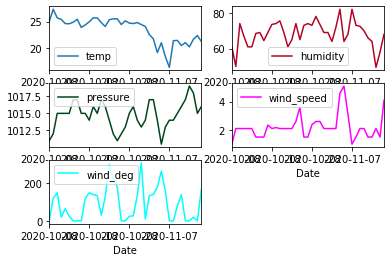

In [46]:
grouped_Givatayim_by_date = Givatayim_df.groupby('Date')

fig = plt.figure()
# Divide the figure into a 3x1 grid, and give me the first section
ax1 = fig.add_subplot(321)
# Divide the figure into a 3x1 grid, and give me the second section
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)

# average temp per date
grouped_Givatayim_by_date.median().temp.plot(ax=ax1,legend=True)
# average humidity per date
grouped_Givatayim_by_date.median().humidity.plot(ax=ax2,colormap='coolwarm_r',legend=True)
# average pressure per date
grouped_Givatayim_by_date.median().pressure.plot(ax=ax3,colormap='Greens_r',legend=True)
# average wind speed per date
grouped_Givatayim_by_date.median().wind_speed.plot(ax=ax4,colormap='spring',legend=True)
# average wind degrees per date
grouped_Givatayim_by_date.median().wind_deg.plot(ax=ax5,colormap='cool',legend=True)


#### min

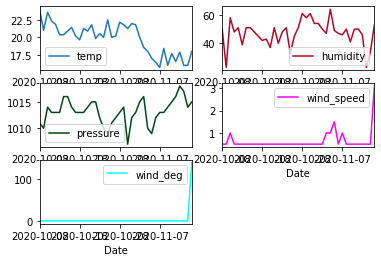

In [47]:
grouped_Givatayim_by_date = Givatayim_df.groupby('Date')

fig = plt.figure()
# Divide the figure into a 3x1 grid, and give me the first section
ax1 = fig.add_subplot(321)
# Divide the figure into a 3x1 grid, and give me the second section
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)

# average temp per date
grouped_Givatayim_by_date.min().temp.plot(ax=ax1,legend=True)
# average humidity per date
grouped_Givatayim_by_date.min().humidity.plot(ax=ax2,colormap='coolwarm_r',legend=True)
# average pressure per date
grouped_Givatayim_by_date.min().pressure.plot(ax=ax3,colormap='Greens_r',legend=True)
# average wind speed per date
grouped_Givatayim_by_date.min().wind_speed.plot(ax=ax4,colormap='spring',legend=True)
# average wind degrees per date
grouped_Givatayim_by_date.min().wind_deg.plot(ax=ax5,colormap='cool',legend=True)


#### max

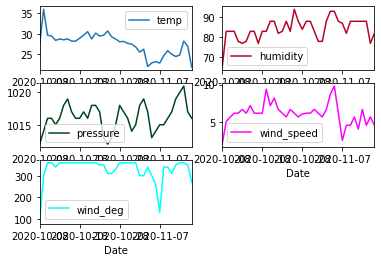

In [48]:
grouped_Givatayim_by_date = Givatayim_df.groupby('Date')

fig = plt.figure()
# Divide the figure into a 3x1 grid, and give me the first section
ax1 = fig.add_subplot(321)
# Divide the figure into a 3x1 grid, and give me the second section
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)

# average temp per date
grouped_Givatayim_by_date.max().temp.plot(ax=ax1,legend=True)
# average humidity per date
grouped_Givatayim_by_date.max().humidity.plot(ax=ax2,colormap='coolwarm_r',legend=True)
# average pressure per date
grouped_Givatayim_by_date.max().pressure.plot(ax=ax3,colormap='Greens_r',legend=True)
# average wind speed per date
grouped_Givatayim_by_date.max().wind_speed.plot(ax=ax4,colormap='spring',legend=True)
# average wind degrees per date
grouped_Givatayim_by_date.max().wind_deg.plot(ax=ax5,colormap='cool',legend=True)


#### Statistics of temperature

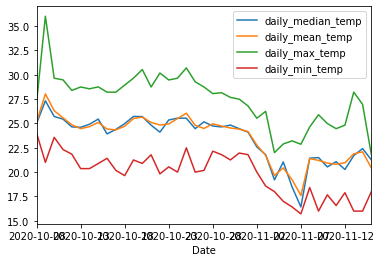

In [49]:
#median temperature per date
grouped_Givatayim_by_date.temp.median().plot(legend=True,label='daily_median_temp')
#mean temp per date
grouped_Givatayim_by_date.temp.mean().plot(legend=True,label='daily_mean_temp')
#max temp per date
grouped_Givatayim_by_date.temp.max().plot(legend=True,label='daily_max_temp')
#min temp per date
grouped_Givatayim_by_date.temp.min().plot(legend=True,label='daily_min_temp')

#### Statistics of humidity

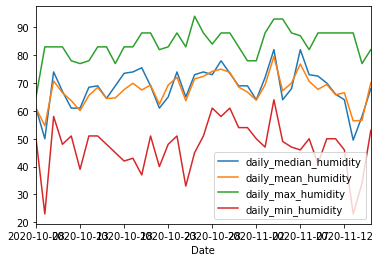

In [50]:
#median humidity per date
grouped_Givatayim_by_date.median().humidity.plot(legend=True,label='daily_median_humidity')
#mean humidity per date
grouped_Givatayim_by_date.mean().humidity.plot(legend=True,label='daily_mean_humidity')
#max humidity per date
grouped_Givatayim_by_date.max().humidity.plot(legend=True,label='daily_max_humidity')
#min humidity per date
grouped_Givatayim_by_date.min().humidity.plot(legend=True,label='daily_min_humidity')

#### Statistics of pressure

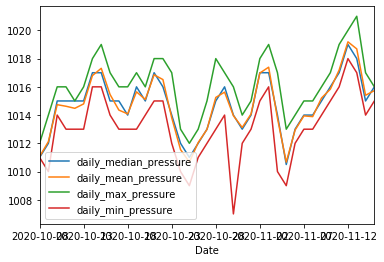

In [51]:
#median pressure per date
grouped_Givatayim_by_date.median().pressure.plot(legend=True,label='daily_median_pressure')
#mean tepressuremp per date
grouped_Givatayim_by_date.mean().pressure.plot(legend=True,label='daily_mean_pressure')
#max pressure per date
grouped_Givatayim_by_date.max().pressure.plot(legend=True,label='daily_max_pressure')
#min pressure per date
grouped_Givatayim_by_date.min().pressure.plot(legend=True,label='daily_min_pressure')

## Summary statistic- 
### How many dates have hours without observations? how many hours per date?

In [52]:
for key, value in grouped_Givatayim_by_date['hour']:
    print(key,value)

2020-10-08 0     22
1     22
2     23
3     23
4     23
5      0
6      0
7      0
8      0
9      0
10     1
11     1
12     1
13     1
14     2
15     2
16     2
Name: hour, dtype: int64
2020-10-09 17     3
18     3
19     3
20     3
21     4
      ..
109    2
110    2
111    2
112    2
113    2
Name: hour, Length: 97, dtype: int64
2020-10-10 114    3
115    3
116    3
117    3
118    4
      ..
204    1
205    1
206    2
207    2
208    2
Name: hour, Length: 95, dtype: int64
2020-10-11 209    3
210    3
211    3
212    3
213    4
      ..
300    1
301    2
302    2
303    2
304    2
Name: hour, Length: 96, dtype: int64
2020-10-12 305    3
306    3
307    3
308    3
309    4
      ..
396    1
397    2
398    2
399    2
400    2
Name: hour, Length: 96, dtype: int64
2020-10-13 401    3
402    3
403    3
404    3
405    4
      ..
492    1
493    2
494    2
495    2
496    2
Name: hour, Length: 96, dtype: int64
2020-10-14 497    3
498    3
499    3
500    3
501    3
      ..
586    1
58

In [53]:
# print (df.groupby([df['Date'].dt.hour, 'weekday'])['Cyclists'].sum().unstack())
Givatayim_grouped_by_date_hour = Givatayim_df.groupby([Givatayim_df['Date'],'hour'])
for key,value in Givatayim_grouped_by_date_hour:
    print(key,value)

('2020-10-08', 0)            dt   temp  temp_min  temp_max  pressure  humidity  wind_speed  \
5  1602190821  25.54      25.0     26.11      1011        61         1.5   
6  1602191699  25.53      25.0     26.11      1011        61         1.5   
7  1602192624  25.18      24.0     26.11      1011        60         1.0   
8  1602193241  25.00      24.0     26.11      1011        60         1.0   
9  1602194398  24.74      24.0     25.56      1011        64         0.5   

   wind_deg        name      human_date_time  seconds_from_beggining  \
5         0  Giv‘atayim  2020-10-09 00:00:21                  6733.0   
6         0  Giv‘atayim  2020-10-09 00:14:59                  7611.0   
7         0  Giv‘atayim  2020-10-09 00:30:24                  8536.0   
8         0  Giv‘atayim  2020-10-09 00:40:41                  9153.0   
9         0  Giv‘atayim  2020-10-09 00:59:58                 10310.0   

   minutes_from_beggining  hours_from_beggining  days_from_beggining  hour  \
5             

36       Day  2020-10-09     10    1      0  
('2020-10-09', 8)             dt  temp  temp_min  temp_max  pressure  humidity  wind_speed  \
37  1602219605  23.0      23.0      23.0      1012        40         2.6   
38  1602220517  23.0      23.0      23.0      1012        40         2.6   
39  1602221406  24.0      24.0      24.0      1012        44         2.6   
40  1602222038  24.0      24.0      24.0      1012        44         2.6   
41  1602222972  25.0      25.0      25.0      1012        50         2.1   

    wind_deg        name      human_date_time  seconds_from_beggining  \
37       120  Giv‘atayim  2020-10-09 08:00:05                 35517.0   
38       120  Giv‘atayim  2020-10-09 08:15:17                 36429.0   
39       140  Giv‘atayim  2020-10-09 08:30:06                 37318.0   
40       140  Giv‘atayim  2020-10-09 08:40:38                 37950.0   
41       140  Giv‘atayim  2020-10-09 08:56:12                 38884.0   

    minutes_from_beggining  hours_from_b

60       Day  2020-10-09     10    1      0  
('2020-10-09', 14)             dt   temp  temp_min  temp_max  pressure  humidity  wind_speed  \
61  1602241217  34.82     33.89      36.0      1011        32         3.6   
62  1602242067  34.63     33.33      36.0      1011        32         3.6   
63  1602243017  34.81     33.89      36.0      1011        30         3.6   
64  1602243898  34.99     33.89      36.0      1011        30         3.6   

    wind_deg        name      human_date_time  seconds_from_beggining  \
61       270  Giv‘atayim  2020-10-09 14:00:17                 57129.0   
62       270  Giv‘atayim  2020-10-09 14:14:27                 57979.0   
63       280  Giv‘atayim  2020-10-09 14:30:17                 58929.0   
64       280  Giv‘atayim  2020-10-09 14:44:58                 59810.0   

    minutes_from_beggining  hours_from_beggining  days_from_beggining  hour  \
61              952.150000             15.869167             0.661215    14   
62              966.31666

100     Night  2020-10-09     10    0      1  
('2020-10-10', 0)              dt   temp  temp_min  temp_max  pressure  humidity  wind_speed  \
197  1602363617  25.01     24.44     25.56      1015        73         1.0   
198  1602364517  24.83     24.44     25.00      1015        73         1.0   
199  1602365416  24.64     24.44     25.00      1015        73         1.5   
200  1602366319  24.46     23.89     25.00      1015        73         1.5   

     wind_deg        name      human_date_time  seconds_from_beggining  \
197         0  Giv‘atayim  2020-10-11 00:00:17                179529.0   
198         0  Giv‘atayim  2020-10-11 00:15:17                180429.0   
199         0  Giv‘atayim  2020-10-11 00:30:16                181328.0   
200         0  Giv‘atayim  2020-10-11 00:45:19                182231.0   

     minutes_from_beggining  hours_from_beggining  days_from_beggining  hour  \
197             2992.150000             49.869167             2.077882     0   
198          

124       Day  2020-10-10     10    1      0  
('2020-10-10', 6)              dt   temp  temp_min  temp_max  pressure  humidity  wind_speed  \
125  1602298819  24.28     23.89      25.0      1014        78         2.1   
126  1602299717  24.29     23.89      25.0      1014        78         2.1   
127  1602300617  23.93     23.89      24.0      1014        83         1.5   
128  1602301521  23.75     23.33      24.0      1014        83         1.5   
129  1602302217  23.75     23.33      24.0      1014        83         1.5   

     wind_deg        name      human_date_time  seconds_from_beggining  \
125       140  Giv‘atayim  2020-10-10 06:00:19                114731.0   
126       140  Giv‘atayim  2020-10-10 06:15:17                115629.0   
127         0  Giv‘atayim  2020-10-10 06:30:17                116529.0   
128         0  Giv‘atayim  2020-10-10 06:45:21                117433.0   
129         0  Giv‘atayim  2020-10-10 06:56:57                118129.0   

     minutes_from_beg

('2020-10-10', 14)              dt   temp  temp_min  temp_max  pressure  humidity  wind_speed  \
158  1602328383  29.45     27.78     30.56      1015        62         5.7   
159  1602329417  29.63     27.78     31.11      1015        62         5.7   
160  1602330070  29.64     27.78     31.11      1015        62         5.7   

     wind_deg        name      human_date_time  seconds_from_beggining  \
158       300  Giv‘atayim  2020-10-10 14:13:03                144295.0   
159       300  Giv‘atayim  2020-10-10 14:30:17                145329.0   
160       300  Giv‘atayim  2020-10-10 14:41:10                145982.0   

     minutes_from_beggining  hours_from_beggining  days_from_beggining  hour  \
158             2404.916667             40.081944             1.670081    14   
159             2422.150000             40.369167             1.682049    14   
160             2433.033333             40.550556             1.689606    14   

    day_night        Date  Month  Day  Night  
158

184     Night  2020-10-10     10    0      1  
('2020-10-10', 21)              dt   temp  temp_min  temp_max  pressure  humidity  wind_speed  \
185  1602352817  25.53     24.44     26.11      1015        74         2.1   
186  1602353664  25.53     24.44     26.11      1015        74         2.1   
187  1602354616  25.53     24.44     26.11      1015        74         2.6   
188  1602355280  25.71     25.00     26.11      1015        74         2.6   

     wind_deg        name      human_date_time  seconds_from_beggining  \
185       350  Giv‘atayim  2020-10-10 21:00:17                168729.0   
186       350  Giv‘atayim  2020-10-10 21:14:24                169576.0   
187       360  Giv‘atayim  2020-10-10 21:30:16                170528.0   
188       360  Giv‘atayim  2020-10-10 21:41:20                171192.0   

     minutes_from_beggining  hours_from_beggining  days_from_beggining  hour  \
185             2812.150000             46.869167             1.952882    21   
186         

('2020-10-11', 6)              dt   temp  temp_min  temp_max  pressure  humidity  wind_speed  \
221  1602385217  22.86     22.78     23.00      1015        78         1.0   
222  1602386116  22.86     22.78     23.00      1015        78         1.0   
223  1602387019  22.32     22.00     22.78      1015        83         1.0   
224  1602387917  22.32     22.00     22.78      1015        83         1.0   
225  1602388730  22.32     22.00     22.78      1015        83         0.5   

     wind_deg        name      human_date_time  seconds_from_beggining  \
221         0  Giv‘atayim  2020-10-11 06:00:17                201129.0   
222         0  Giv‘atayim  2020-10-11 06:15:16                202028.0   
223         0  Giv‘atayim  2020-10-11 06:30:19                202931.0   
224         0  Giv‘atayim  2020-10-11 06:45:17                203829.0   
225         0  Giv‘atayim  2020-10-11 06:58:50                204642.0   

     minutes_from_beggining  hours_from_beggining  days_from_beggini

253       Day  2020-10-11     10    1      0  
('2020-10-11', 14)              dt   temp  temp_min  temp_max  pressure  humidity  wind_speed  \
254  1602414918  28.93     27.78     30.00      1014        54         4.6   
255  1602415814  29.46     27.78     30.56      1013        51         5.1   
256  1602416461  29.47     27.78     30.56      1013        51         5.1   
257  1602417484  28.72     27.22     30.00      1013        54         5.7   

     wind_deg        name      human_date_time  seconds_from_beggining  \
254       310  Giv‘atayim  2020-10-11 14:15:18                230830.0   
255       290  Giv‘atayim  2020-10-11 14:30:14                231726.0   
256       290  Giv‘atayim  2020-10-11 14:41:01                232373.0   
257       310  Giv‘atayim  2020-10-11 14:58:04                233396.0   

     minutes_from_beggining  hours_from_beggining  days_from_beggining  hour  \
254             3847.166667             64.119444             2.671644    14   
255         

('2020-10-12', 1)              dt   temp  temp_min  temp_max  pressure  humidity  wind_speed  \
393  1602540017  22.85     22.22     23.33      1015        69         1.0   
394  1602540917  22.85     22.22     23.33      1015        69         1.0   
395  1602541593  22.30     21.67     23.33      1015        68         2.1   
396  1602542587  22.14     21.67     22.78      1015        68         2.1   

     wind_deg        name      human_date_time  seconds_from_beggining  \
393         0  Giv‘atayim  2020-10-13 01:00:17                355929.0   
394         0  Giv‘atayim  2020-10-13 01:15:17                356829.0   
395       110  Giv‘atayim  2020-10-13 01:26:33                357505.0   
396       110  Giv‘atayim  2020-10-13 01:43:07                358499.0   

     minutes_from_beggining  hours_from_beggining  days_from_beggining  hour  \
393             5932.150000             98.869167             4.119549     1   
394             5947.150000             99.119167           

321       Day  2020-10-12     10    1      0  
('2020-10-12', 7)              dt   temp  temp_min  temp_max  pressure  humidity  wind_speed  \
322  1602476124  21.84     21.67     22.00      1015        78         0.5   
323  1602477017  21.84     21.67     22.00      1015        78         0.5   
324  1602477917  22.11     22.00     22.22      1015        78         0.5   
325  1602478658  22.37     22.00     22.78      1015        78         0.5   

     wind_deg        name      human_date_time  seconds_from_beggining  \
322         0  Giv‘atayim  2020-10-12 07:15:24                292036.0   
323         0  Giv‘atayim  2020-10-12 07:30:17                292929.0   
324         0  Giv‘atayim  2020-10-12 07:45:17                293829.0   
325         0  Giv‘atayim  2020-10-12 07:57:38                294570.0   

     minutes_from_beggining  hours_from_beggining  days_from_beggining  hour  \
322             4867.266667             81.121111             3.380046     7   
323          

348       Day  2020-10-12     10    1      0  
('2020-10-12', 14)              dt   temp  temp_min  temp_max  pressure  humidity  wind_speed  \
349  1602500418  28.38     26.67     29.44      1014        51         4.6   
350  1602501317  28.36     26.67     29.44      1014        51         4.6   
351  1602502217  28.02     26.67     29.44      1014        54         5.1   
352  1602502892  28.02     26.67     29.44      1014        54         5.1   

     wind_deg        name      human_date_time  seconds_from_beggining  \
349       300  Giv‘atayim  2020-10-12 14:00:18                316330.0   
350       300  Giv‘atayim  2020-10-12 14:15:17                317229.0   
351       310  Giv‘atayim  2020-10-12 14:30:17                318129.0   
352       310  Giv‘atayim  2020-10-12 14:41:32                318804.0   

     minutes_from_beggining  hours_from_beggining  days_from_beggining  hour  \
349             5272.166667             87.869444             3.661227    14   
350         

('2020-10-12', 20)              dt   temp  temp_min  temp_max  pressure  humidity  wind_speed  \
374  1602522675  25.35     24.44     26.00      1014        57         2.6   
375  1602523816  24.99     24.44     25.56      1015        61         2.6   
376  1602524715  24.62     23.89     25.00      1015        61         2.6   

     wind_deg        name      human_date_time  seconds_from_beggining  \
374       340  Giv‘atayim  2020-10-12 20:11:15                338587.0   
375       340  Giv‘atayim  2020-10-12 20:30:16                339728.0   
376       340  Giv‘atayim  2020-10-12 20:45:15                340627.0   

     minutes_from_beggining  hours_from_beggining  days_from_beggining  hour  \
374             5643.116667             94.051944             3.918831    20   
375             5662.133333             94.368889             3.932037    20   
376             5677.116667             94.618611             3.942442    20   

    day_night        Date  Month  Day  Night  
374

404     Night  2020-10-13     10    0      1  
('2020-10-13', 4)              dt   temp  temp_min  temp_max  pressure  humidity  wind_speed  \
405  1602550800  21.77     21.11     22.22      1014        73         1.0   
406  1602551717  21.77     21.11     22.22      1014        73         1.0   
407  1602552617  21.77     21.11     22.22      1014        73         1.0   
408  1602553517  21.78     21.11     22.22      1014        73         1.0   

     wind_deg        name      human_date_time  seconds_from_beggining  \
405         0  Giv‘atayim  2020-10-13 04:00:00                366712.0   
406         0  Giv‘atayim  2020-10-13 04:15:17                367629.0   
407         0  Giv‘atayim  2020-10-13 04:30:17                368529.0   
408         0  Giv‘atayim  2020-10-13 04:45:17                369429.0   

     minutes_from_beggining  hours_from_beggining  days_from_beggining  hour  \
405             6111.866667            101.864444             4.244352     4   
406          

('2020-10-13', 12)              dt   temp  temp_min  temp_max  pressure  humidity  wind_speed  \
438  1602580517  26.79     26.67      27.0      1015        51         2.1   
439  1602581337  27.32     26.67      28.0      1015        48         4.1   
440  1602582318  27.32     26.67      28.0      1015        48         4.1   

     wind_deg        name      human_date_time  seconds_from_beggining  \
438       350  Giv‘atayim  2020-10-13 12:15:17                396429.0   
439       280  Giv‘atayim  2020-10-13 12:28:57                397249.0   
440       280  Giv‘atayim  2020-10-13 12:45:18                398230.0   

     minutes_from_beggining  hours_from_beggining  days_from_beggining  hour  \
438             6607.150000            110.119167             4.588299    12   
439             6620.816667            110.346944             4.597789    12   
440             6637.166667            110.619444             4.609144    12   

    day_night        Date  Month  Day  Night  
438

('2020-10-13', 19)              dt   temp  temp_min  temp_max  pressure  humidity  wind_speed  \
465  1602604817  25.71      25.0     26.11      1014        57         5.7   
466  1602605583  25.70      25.0     26.11      1014        57         5.7   
467  1602606617  25.54      25.0     26.00      1015        57         4.6   
468  1602607522  25.53      25.0     26.00      1015        57         4.6   

     wind_deg        name      human_date_time  seconds_from_beggining  \
465       340  Giv‘atayim  2020-10-13 19:00:17                420729.0   
466       340  Giv‘atayim  2020-10-13 19:13:03                421495.0   
467       350  Giv‘atayim  2020-10-13 19:30:17                422529.0   
468       350  Giv‘atayim  2020-10-13 19:45:22                423434.0   

     minutes_from_beggining  hours_from_beggining  days_from_beggining  hour  \
465             7012.150000            116.869167             4.869549    19   
466             7024.916667            117.081944          

('2020-10-14', 2)              dt   temp  temp_min  temp_max  pressure  humidity  wind_speed  \
588  1602717324  22.85     22.22     23.33      1018        78         1.5   
589  1602718218  22.85     22.22     23.33      1018        78         2.1   
590  1602719117  22.68     22.22     23.00      1018        78         2.1   

     wind_deg        name      human_date_time  seconds_from_beggining  \
588         0  Giv‘atayim  2020-10-15 02:15:24                533236.0   
589       150  Giv‘atayim  2020-10-15 02:30:18                534130.0   
590       150  Giv‘atayim  2020-10-15 02:45:17                535029.0   

     minutes_from_beggining  hours_from_beggining  days_from_beggining  hour  \
588             8887.266667            148.121111             6.171713     2   
589             8902.166667            148.369444             6.182060     2   
590             8917.150000            148.619167             6.192465     2   

    day_night        Date  Month  Day  Night  
588 

536       Day  2020-10-14     10    1      0  
('2020-10-14', 13)              dt   temp  temp_min  temp_max  pressure  humidity  wind_speed  \
537  1602670517  27.85     27.22     28.33      1017        58         5.1   
538  1602671417  28.17     26.67     29.00      1017        54         4.1   
539  1602672317  28.36     27.22     29.00      1017        54         4.1   
540  1602673071  28.38     27.22     29.00      1016        54         5.1   

     wind_deg        name      human_date_time  seconds_from_beggining  \
537       300  Giv‘atayim  2020-10-14 13:15:17                486429.0   
538       310  Giv‘atayim  2020-10-14 13:30:17                487329.0   
539       310  Giv‘atayim  2020-10-14 13:45:17                488229.0   
540       320  Giv‘atayim  2020-10-14 13:57:51                488983.0   

     minutes_from_beggining  hours_from_beggining  days_from_beggining  hour  \
537             8107.150000            135.119167             5.629965    13   
538         

572     Night  2020-10-14     10    0      1  
('2020-10-14', 22)              dt   temp  temp_min  temp_max  pressure  humidity  wind_speed  \
573  1602702917  24.82     24.44      25.0      1017        73         1.5   
574  1602703822  24.64     23.89      25.0      1017        69         1.0   
575  1602704592  24.64     23.89      25.0      1017        69         1.0   

     wind_deg        name      human_date_time  seconds_from_beggining  \
573         0  Giv‘atayim  2020-10-14 22:15:17                518829.0   
574         0  Giv‘atayim  2020-10-14 22:30:22                519734.0   
575         0  Giv‘atayim  2020-10-14 22:43:12                520504.0   

     minutes_from_beggining  hours_from_beggining  days_from_beggining  hour  \
573             8647.150000            144.119167             6.004965    22   
574             8662.233333            144.370556             6.015440    22   
575             8675.066667            144.584444             6.024352    22   

   

603       Day  2020-10-15     10    1      0  
('2020-10-15', 6)              dt   temp  temp_min  temp_max  pressure  humidity  wind_speed  \
604  1602731717  20.89     20.56     21.11      1018        83         2.1   
605  1602732617  20.88     20.56     21.11      1018        83         1.5   
606  1602733517  20.89     20.56     21.11      1018        83         1.5   
607  1602734378  20.89     20.56     21.11      1018        83         1.5   

     wind_deg        name      human_date_time  seconds_from_beggining  \
604       140  Giv‘atayim  2020-10-15 06:15:17                547629.0   
605         0  Giv‘atayim  2020-10-15 06:30:17                548529.0   
606         0  Giv‘atayim  2020-10-15 06:45:17                549429.0   
607         0  Giv‘atayim  2020-10-15 06:59:38                550290.0   

     minutes_from_beggining  hours_from_beggining  days_from_beggining  hour  \
604                 9127.15            152.119167             6.338299     6   
605          

634       Day  2020-10-15     10    1      0  
('2020-10-15', 14)              dt   temp  temp_min  temp_max  pressure  humidity  wind_speed  \
635  1602759617  28.56     27.22     29.44      1017        58         5.1   
636  1602760039  28.57     27.22     29.44      1017        58         5.1   
637  1602761417  28.74     27.22     30.00      1017        58         5.1   
638  1602762323  28.75     27.22     30.00      1017        58         5.1   

     wind_deg        name      human_date_time  seconds_from_beggining  \
635       310  Giv‘atayim  2020-10-15 14:00:17                575529.0   
636       310  Giv‘atayim  2020-10-15 14:07:19                575951.0   
637       320  Giv‘atayim  2020-10-15 14:30:17                577329.0   
638       320  Giv‘atayim  2020-10-15 14:45:23                578235.0   

     minutes_from_beggining  hours_from_beggining  days_from_beggining  hour  \
635             9592.150000            159.869167             6.661215    14   
636         

694     Night  2020-10-16     10    0      1  
('2020-10-16', 5)              dt   temp  temp_min  temp_max  pressure  humidity  wind_speed  \
695  1602813617  21.79      21.0     22.78      1016        83         1.0   
696  1602814434  21.78      21.0     22.78      1016        83         1.0   
697  1602815314  21.79      21.0     22.78      1016        83         1.0   
698  1602816144  21.60      21.0     22.78      1016        83         1.0   

     wind_deg        name      human_date_time  seconds_from_beggining  \
695         0  Giv‘atayim  2020-10-16 05:00:17                629529.0   
696         0  Giv‘atayim  2020-10-16 05:13:54                630346.0   
697         0  Giv‘atayim  2020-10-16 05:28:34                631226.0   
698         0  Giv‘atayim  2020-10-16 05:42:24                632056.0   

     minutes_from_beggining  hours_from_beggining  days_from_beggining  hour  \
695            10492.150000            174.869167             7.286215     5   
696          

718       Day  2020-10-16     10    1      0  
('2020-10-16', 11)              dt   temp  temp_min  temp_max  pressure  humidity  wind_speed  \
719  1602835224  26.09     25.56     26.67      1017        54         4.1   
720  1602836117  26.25     26.00     26.67      1017        54         4.1   
721  1602836804  26.60     26.11     27.00      1017        51         2.1   
722  1602837917  26.78     26.67     27.00      1017        51         2.1   
723  1602838787  27.15     26.67     28.00      1016        48         2.6   

     wind_deg        name      human_date_time  seconds_from_beggining  \
719       350  Giv‘atayim  2020-10-16 11:00:24                651136.0   
720       350  Giv‘atayim  2020-10-16 11:15:17                652029.0   
721       310  Giv‘atayim  2020-10-16 11:26:44                652716.0   
722       310  Giv‘atayim  2020-10-16 11:45:17                653829.0   
723       320  Giv‘atayim  2020-10-16 11:59:47                654699.0   

     minutes_from_be

762     Night  2020-10-16     10    0      1  
('2020-10-16', 22)              dt   temp  temp_min  temp_max  pressure  humidity  wind_speed  \
763  1602874818  23.92     23.33     24.44      1015        64         2.1   
764  1602875447  23.91     23.33     24.44      1015        64         2.1   
765  1602876617  23.21     22.78     23.89      1015        69         1.5   
766  1602877524  23.21     22.78     23.89      1015        69         1.5   

     wind_deg        name      human_date_time  seconds_from_beggining  \
763        30  Giv‘atayim  2020-10-16 22:00:18                690730.0   
764        30  Giv‘atayim  2020-10-16 22:10:47                691359.0   
765         0  Giv‘atayim  2020-10-16 22:30:17                692529.0   
766         0  Giv‘atayim  2020-10-16 22:45:24                693436.0   

     minutes_from_beggining  hours_from_beggining  days_from_beggining  hour  \
763            11512.166667            191.869444             7.994560    22   
764         

786     Night  2020-10-17     10    0      1  
('2020-10-17', 4)              dt   temp  temp_min  temp_max  pressure  humidity  wind_speed  \
787  1602896417  21.78     21.11     22.22      1015        73         1.5   
788  1602897317  21.78     21.11     22.22      1015        73         1.5   
789  1602898217  21.61     21.11     22.00      1015        73         2.6   
790  1602899117  21.60     21.11     22.00      1015        73         2.6   

     wind_deg        name      human_date_time  seconds_from_beggining  \
787         0  Giv‘atayim  2020-10-17 04:00:17                712329.0   
788         0  Giv‘atayim  2020-10-17 04:15:17                713229.0   
789       130  Giv‘atayim  2020-10-17 04:30:17                714129.0   
790       130  Giv‘atayim  2020-10-17 04:45:17                715029.0   

     minutes_from_beggining  hours_from_beggining  days_from_beggining  hour  \
787                11872.15            197.869167             8.244549     4   
788          

('2020-10-17', 12)              dt   temp  temp_min  temp_max  pressure  humidity  wind_speed  \
819  1602925217  27.14     26.67      28.0      1015        48         2.6   
820  1602926056  27.14     26.67      28.0      1015        48         2.6   
821  1602927019  27.32     26.67      28.0      1014        45         3.6   
822  1602927917  27.50     26.67      28.0      1014        45         3.6   
823  1602928644  27.86     26.67      29.0      1014        48         3.6   

     wind_deg        name      human_date_time  seconds_from_beggining  \
819        10  Giv‘atayim  2020-10-17 12:00:17                741129.0   
820        10  Giv‘atayim  2020-10-17 12:14:16                741968.0   
821       340  Giv‘atayim  2020-10-17 12:30:19                742931.0   
822       340  Giv‘atayim  2020-10-17 12:45:17                743829.0   
823       330  Giv‘atayim  2020-10-17 12:57:24                744556.0   

     minutes_from_beggining  hours_from_beggining  days_from_beggin

854     Night  2020-10-17     10    0      1  
('2020-10-17', 21)              dt   temp  temp_min  temp_max  pressure  humidity  wind_speed  \
855  1602957617  24.82     24.44      25.0      1014        69         2.1   
856  1602958523  24.63     23.89      25.0      1014        69         2.1   
857  1602959417  24.65     23.89      25.0      1014        69         2.1   
858  1602960317  24.48     23.89      25.0      1014        69         2.1   

     wind_deg        name      human_date_time  seconds_from_beggining  \
855        30  Giv‘atayim  2020-10-17 21:00:17                773529.0   
856        30  Giv‘atayim  2020-10-17 21:15:23                774435.0   
857        10  Giv‘atayim  2020-10-17 21:30:17                775329.0   
858        10  Giv‘atayim  2020-10-17 21:45:17                776229.0   

     minutes_from_beggining  hours_from_beggining  days_from_beggining  hour  \
855                12892.15            214.869167             8.952882    21   
856         

894       Day  2020-10-18     10    1      0  
('2020-10-18', 7)              dt   temp  temp_min  temp_max  pressure  humidity  wind_speed  \
895  1602993617  19.64     19.00     20.56      1014        82         1.5   
896  1602994524  19.64     19.00     20.56      1014        82         1.5   
897  1602995142  19.98     19.44     20.56      1014        77         1.5   
898  1602996317  20.18     20.00     20.56      1014        77         1.5   

     wind_deg        name      human_date_time  seconds_from_beggining  \
895         0  Giv‘atayim  2020-10-18 07:00:17                809529.0   
896         0  Giv‘atayim  2020-10-18 07:15:24                810436.0   
897         0  Giv‘atayim  2020-10-18 07:25:42                811054.0   
898         0  Giv‘atayim  2020-10-18 07:45:17                812229.0   

     minutes_from_beggining  hours_from_beggining  days_from_beggining  hour  \
895            13492.150000            224.869167             9.369549     7   
896          

919       Day  2020-10-18     10    1      0  
('2020-10-18', 13)              dt   temp  temp_min  temp_max  pressure  humidity  wind_speed  \
920  1603016120  28.58     27.22      30.0      1014        48         2.6   
921  1603017015  28.76     27.22      30.0      1013        51         3.1   
922  1603017737  28.76     27.22      30.0      1013        51         3.1   
923  1603018723  28.74     27.22      30.0      1013        55         5.7   

     wind_deg        name      human_date_time  seconds_from_beggining  \
920       310  Giv‘atayim  2020-10-18 13:15:20                832032.0   
921       300  Giv‘atayim  2020-10-18 13:30:15                832927.0   
922       300  Giv‘atayim  2020-10-18 13:42:17                833649.0   
923       280  Giv‘atayim  2020-10-18 13:58:43                834635.0   

     minutes_from_beggining  hours_from_beggining  days_from_beggining  hour  \
920            13867.200000            231.120000             9.630000    13   
921         

('2020-10-18', 22)              dt   temp  temp_min  temp_max  pressure  humidity  wind_speed  \
955  1603047619  24.97     24.44     25.56      1014        78         0.5   
956  1603048466  24.98     24.44     25.56      1014        78         0.5   
957  1603049394  24.82     24.44     25.00      1015        73         0.5   
958  1603050317  24.64     23.89     25.00      1015        73         0.5   

     wind_deg        name      human_date_time  seconds_from_beggining  \
955         0  Giv‘atayim  2020-10-18 22:00:19                863531.0   
956         0  Giv‘atayim  2020-10-18 22:14:26                864378.0   
957         0  Giv‘atayim  2020-10-18 22:29:54                865306.0   
958         0  Giv‘atayim  2020-10-18 22:45:17                866229.0   

     minutes_from_beggining  hours_from_beggining  days_from_beggining  hour  \
955            14392.183333            239.869722             9.994572    22   
956            14406.300000            240.105000          

('2020-10-19', 4)              dt   temp  temp_min  temp_max  pressure  humidity  wind_speed  \
979  1603069217  22.50     22.22      23.0      1015        78         1.5   
980  1603070116  22.32     21.67      23.0      1015        78         1.5   
981  1603071017  22.14     21.67      23.0      1015        78         2.1   
982  1603071917  22.14     21.67      23.0      1015        78         2.1   

     wind_deg        name      human_date_time  seconds_from_beggining  \
979         0  Giv‘atayim  2020-10-19 04:00:17                885129.0   
980         0  Giv‘atayim  2020-10-19 04:15:16                886028.0   
981       150  Giv‘atayim  2020-10-19 04:30:17                886929.0   
982       150  Giv‘atayim  2020-10-19 04:45:17                887829.0   

     minutes_from_beggining  hours_from_beggining  days_from_beggining  hour  \
979            14752.150000            245.869167            10.244549     4   
980            14767.133333            246.118889           

('2020-10-19', 14)               dt   temp  temp_min  temp_max  pressure  humidity  wind_speed  \
1020  1603105848  29.17     28.33     30.00      1017        61        2.24   
1021  1603106885  29.46     28.33     30.56      1017        60        0.89   
1022  1603107917  29.45     28.33     30.56      1017        59        2.68   
1023  1603108620  29.16     28.33     30.00      1014        68        7.18   

      wind_deg        name      human_date_time  seconds_from_beggining  \
1020       292  Giv‘atayim  2020-10-19 14:10:48                921760.0   
1021       297  Giv‘atayim  2020-10-19 14:28:05                922797.0   
1022       300  Giv‘atayim  2020-10-19 14:45:17                923829.0   
1023       334  Giv‘atayim  2020-10-19 14:57:00                924532.0   

      minutes_from_beggining  hours_from_beggining  days_from_beggining  hour  \
1020            15362.666667            256.044444            10.668519    14   
1021            15379.950000            256.332

1055     Night  2020-10-19     10    0      1  
('2020-10-19', 23)               dt   temp  temp_min  temp_max  pressure  humidity  wind_speed  \
1056  1603138523  25.18      25.0     25.56      1016        78         0.5   
1057  1603139151  25.18      25.0     25.56      1016        78         0.5   
1058  1603140317  25.18      25.0     25.56      1016        78         2.1   
1059  1603141049  25.18      25.0     25.56      1016        78         2.1   

      wind_deg        name      human_date_time  seconds_from_beggining  \
1056         0  Giv‘atayim  2020-10-19 23:15:23                954435.0   
1057         0  Giv‘atayim  2020-10-19 23:25:51                955063.0   
1058       140  Giv‘atayim  2020-10-19 23:45:17                956229.0   
1059       140  Giv‘atayim  2020-10-19 23:57:29                956961.0   

      minutes_from_beggining  hours_from_beggining  days_from_beggining  hour  \
1056            15907.250000            265.120833            11.046701    23   

1106       Day  2020-10-20     10    1      0  
('2020-10-20', 12)               dt   temp  temp_min  temp_max  pressure  humidity  wind_speed  \
1107  1603184417  29.48     28.33      31.0      1015        48         1.5   
1108  1603185317  29.29     27.78      31.0      1015        48         1.5   
1109  1603186217  28.95     27.78      30.0      1015        48         4.1   
1110  1603187031  29.10     28.33      30.0      1015        48         4.1   
1111  1603187983  29.29     28.33      30.0      1015        48         4.1   

      wind_deg        name      human_date_time  seconds_from_beggining  \
1107         0  Giv‘atayim  2020-10-20 12:00:17               1000329.0   
1108         0  Giv‘atayim  2020-10-20 12:15:17               1001229.0   
1109       300  Giv‘atayim  2020-10-20 12:30:17               1002129.0   
1110       300  Giv‘atayim  2020-10-20 12:43:51               1002943.0   
1111       300  Giv‘atayim  2020-10-20 12:59:43               1003895.0   

      m

1259     Night  2020-10-21     10    0      1  
('2020-10-21', 2)               dt   temp  temp_min  temp_max  pressure  humidity  wind_speed  \
1260  1603322121  22.31     21.67     23.33      1018        73         0.5   
1261  1603323017  21.96     21.00     23.33      1018        77         1.0   
1262  1603323894  21.78     21.00     22.78      1018        77         1.0   

      wind_deg        name      human_date_time  seconds_from_beggining  \
1260         0  Giv‘atayim  2020-10-22 02:15:21               1138033.0   
1261         0  Giv‘atayim  2020-10-22 02:30:17               1138929.0   
1262         0  Giv‘atayim  2020-10-22 02:44:54               1139806.0   

      minutes_from_beggining  hours_from_beggining  days_from_beggining  hour  \
1260            18967.216667            316.120278            13.171678     2   
1261            18982.150000            316.369167            13.182049     2   
1262            18996.766667            316.612778            13.192199  

('2020-10-21', 16)               dt   temp  temp_min  temp_max  pressure  humidity  wind_speed  \
1219  1603285217  28.57     27.78      29.0      1016        51         6.7   
1220  1603286093  28.39     27.78      29.0      1016        54         7.2   
1221  1603287017  28.39     27.78      29.0      1016        54         7.2   
1222  1603287916  28.03     26.67      29.0      1016        54         7.2   
1223  1603288793  27.67     26.11      29.0      1016        54         7.2   

      wind_deg        name      human_date_time  seconds_from_beggining  \
1219       330  Giv‘atayim  2020-10-21 16:00:17               1101129.0   
1220       330  Giv‘atayim  2020-10-21 16:14:53               1102005.0   
1221       330  Giv‘atayim  2020-10-21 16:30:17               1102929.0   
1222       340  Giv‘atayim  2020-10-21 16:45:16               1103828.0   
1223       340  Giv‘atayim  2020-10-21 16:59:53               1104705.0   

      minutes_from_beggining  hours_from_beggining  day

1283       Day  2020-10-22     10    1      0  
('2020-10-22', 8)               dt   temp  temp_min  temp_max  pressure  humidity  wind_speed  \
1284  1603343663  20.35      19.0     21.67      1018        82         1.5   
1285  1603344600  21.25      21.0     21.67      1018        73         1.0   
1286  1603345518  21.99      21.0     22.78      1018        73         1.0   
1287  1603346209  22.33      22.0     22.78      1018        68         1.0   

      wind_deg        name      human_date_time  seconds_from_beggining  \
1284         0  Giv‘atayim  2020-10-22 08:14:23               1159575.0   
1285         0  Giv‘atayim  2020-10-22 08:30:00               1160512.0   
1286         0  Giv‘atayim  2020-10-22 08:45:18               1161430.0   
1287         0  Giv‘atayim  2020-10-22 08:56:49               1162121.0   

      minutes_from_beggining  hours_from_beggining  days_from_beggining  hour  \
1284            19326.250000            322.104167            13.421007     8   


1342     Night  2020-10-22     10    0      1  
('2020-10-22', 23)               dt   temp  temp_min  temp_max  pressure  humidity  wind_speed  \
1343  1603396818  22.68     22.00     23.33      1016        68         1.0   
1344  1603397721  22.67     22.00     23.33      1016        68         1.0   
1345  1603398602  22.86     22.78     23.00      1016        69         1.0   
1346  1603399517  22.86     22.78     23.00      1016        69         1.0   
1347  1603400224  22.86     22.78     23.00      1016        69         2.1   

      wind_deg        name      human_date_time  seconds_from_beggining  \
1343         0  Giv‘atayim  2020-10-22 23:00:18               1212730.0   
1344         0  Giv‘atayim  2020-10-22 23:15:21               1213633.0   
1345         0  Giv‘atayim  2020-10-22 23:30:02               1214514.0   
1346         0  Giv‘atayim  2020-10-22 23:45:17               1215429.0   
1347       210  Giv‘atayim  2020-10-22 23:57:04               1216136.0   

      m

1402       Day  2020-10-23     10    1      0  
('2020-10-23', 14)               dt   temp  temp_min  temp_max  pressure  humidity  wind_speed  \
1403  1603450817  29.28     27.78      30.0      1015        55         3.6   
1404  1603451718  29.27     27.78      30.0      1015        55         3.6   
1405  1603452618  29.28     27.78      30.0      1014        58         4.6   
1406  1603453525  29.28     27.78      30.0      1014        58         4.6   

      wind_deg        name      human_date_time  seconds_from_beggining  \
1403       280  Giv‘atayim  2020-10-23 14:00:17               1266729.0   
1404       280  Giv‘atayim  2020-10-23 14:15:18               1267630.0   
1405       280  Giv‘atayim  2020-10-23 14:30:18               1268530.0   
1406       280  Giv‘atayim  2020-10-23 14:45:25               1269437.0   

      minutes_from_beggining  hours_from_beggining  days_from_beggining  hour  \
1403            21112.150000            351.869167            14.661215    14   

1469     Night  2020-10-23     10    0      1  
('2020-10-23', 19)               dt   temp  temp_min  temp_max  pressure  humidity  wind_speed  \
1470  1603468818  26.42     25.56      27.0      1014        65         3.6   
1471  1603468818  26.42     25.56      27.0      1014        65         3.6   
1472  1603468818  26.42     25.56      27.0      1014        65         3.6   
1473  1603468818  26.42     25.56      27.0      1014        65         3.6   
1474  1603468818  26.42     25.56      27.0      1014        65         3.6   
...          ...    ...       ...       ...       ...       ...         ...   
1529  1603471518  26.04     25.00      27.0      1014        65         2.1   
1530  1603471518  26.04     25.00      27.0      1014        65         2.1   
1531  1603471518  26.04     25.00      27.0      1014        65         2.1   
1532  1603471518  26.04     25.00      27.0      1014        65         2.1   
1533  1603471518  26.04     25.00      27.0      1014        65 

('2020-10-24', 3)               dt   temp  temp_min  temp_max  pressure  humidity  wind_speed  \
1660  1603497626  20.72     20.56      21.0      1012        83         2.1   
1661  1603497687  20.71     20.56      21.0      1012        83         2.1   
1662  1603498517  20.72     20.56      21.0      1012        83         2.1   
1663  1603498588  20.71     20.56      21.0      1012        83         2.1   
1664  1603499310  20.72     20.56      21.0      1012        83         2.1   
1665  1603499490  20.71     20.56      21.0      1012        83         2.1   
1666  1603500018  20.72     20.56      21.0      1012        83         2.1   
1667  1603500392  20.71     20.56      21.0      1012        83         1.5   

      wind_deg        name      human_date_time  seconds_from_beggining  \
1660       150  Giv‘atayim  2020-10-24 03:00:26               1313538.0   
1661       150  Giv‘atayim  2020-10-24 03:01:27               1313599.0   
1662       150  Giv‘atayim  2020-10-24 03:15:

1705       Day  2020-10-24     10    1      0  
('2020-10-24', 7)               dt   temp  temp_min  temp_max  pressure  humidity  wind_speed  \
1706  1603512017  20.36      20.0     20.56      1011        88         1.0   
1707  1603512043  20.36      20.0     20.56      1011        88         1.0   
1708  1603512936  20.54      20.0     21.11      1011        88         1.0   
1709  1603513019  20.37      20.0     20.56      1011        88         1.0   
1710  1603513768  20.36      20.0     20.56      1012        88         0.5   
1711  1603513768  20.36      20.0     20.56      1012        88         0.5   
1712  1603513768  20.36      20.0     20.56      1012        88         0.5   
1713  1603513768  20.36      20.0     20.56      1012        88         0.5   
1714  1603513768  20.36      20.0     20.56      1012        88         0.5   
1715  1603513768  20.36      20.0     20.56      1012        88         0.5   
1716  1603513768  20.36      20.0     20.56      1012        88  

1896       Day  2020-10-24     10    1      0  
('2020-10-24', 17)               dt   temp  temp_min  temp_max  pressure  humidity  wind_speed  \
1897  1603548020  28.20     27.22      29.0      1010        58         2.6   
1898  1603548020  28.20     27.22      29.0      1010        58         2.6   
1899  1603548020  28.20     27.22      29.0      1010        58         2.6   
1900  1603548020  28.20     27.22      29.0      1010        58         2.6   
1901  1603548020  28.20     27.22      29.0      1010        58         2.6   
1902  1603548020  28.20     27.22      29.0      1010        58         2.6   
1903  1603548020  28.20     27.22      29.0      1010        58         2.6   
1904  1603548020  28.20     27.22      29.0      1010        58         2.6   
1905  1603548020  28.20     27.22      29.0      1010        58         2.6   
1906  1603548020  28.20     27.22      29.0      1010        58         2.6   
1907  1603548020  28.20     27.22      29.0      1010        58 

('2020-10-24', 21)               dt   temp  temp_min  temp_max  pressure  humidity  wind_speed  \
2013  1603562417  25.53      25.0      26.0      1012        74         5.1   
2014  1603562627  25.52      25.0      26.0      1012        74         5.1   
2015  1603563317  25.53      25.0      26.0      1012        74         5.1   
2016  1603563528  25.52      25.0      26.0      1012        74         4.1   
2017  1603564165  25.53      25.0      26.0      1012        74         4.1   
2018  1603564165  25.53      25.0      26.0      1012        74         4.1   
2019  1603564165  25.53      25.0      26.0      1012        74         4.1   
2020  1603564165  25.53      25.0      26.0      1012        74         4.1   
2021  1603564165  25.53      25.0      26.0      1012        74         4.1   
2022  1603564165  25.53      25.0      26.0      1012        74         4.1   
2023  1603564165  25.53      25.0      26.0      1012        74         4.1   
2024  1603564165  25.53      25.0

2854     Night  2020-10-25     10    0      1  
('2020-10-25', 2)               dt   temp  temp_min  temp_max  pressure  humidity  wind_speed  \
2173  1603584018  25.00      25.0     25.00      1010        73         4.1   
2174  1603584018  25.00      25.0     25.00      1010        73         4.1   
2175  1603584018  25.00      25.0     25.00      1010        73         4.1   
2176  1603584018  25.00      25.0     25.00      1010        73         4.1   
2177  1603584018  25.00      25.0     25.00      1010        73         4.1   
2178  1603584018  25.00      25.0     25.00      1010        73         4.1   
2179  1603584018  25.00      25.0     25.00      1010        73         4.1   
2180  1603584018  25.00      25.0     25.00      1010        73         4.1   
2181  1603584018  25.00      25.0     25.00      1010        73         4.1   
2182  1603584018  25.00      25.0     25.00      1010        73         4.1   
2183  1603584018  25.00      25.0     25.00      1010        73  

2450       Day  2020-10-25     10    1      0  
('2020-10-25', 12)               dt   temp  temp_min  temp_max  pressure  humidity  wind_speed  \
2451  1603620917  29.99     28.33      31.0      1010        43         4.1   
2452  1603621251  30.67     28.33      33.0      1010        33         4.1   
2453  1603621818  30.52     28.33      33.0      1010        33         4.1   
2454  1603622153  30.67     28.33      33.0      1010        33         4.1   
2455  1603622717  30.70     28.33      33.0      1010        33         4.1   
2456  1603623055  30.32     28.33      32.0      1010        40         4.6   
2457  1603623055  30.32     28.33      32.0      1010        40         4.6   
2458  1603623055  30.32     28.33      32.0      1010        40         4.6   
2459  1603623055  30.32     28.33      32.0      1010        40         4.6   
2460  1603623055  30.32     28.33      32.0      1010        40         4.6   
2461  1603623055  30.32     28.33      32.0      1010        40 

('2020-10-25', 22)               dt   temp  temp_min  temp_max  pressure  humidity  wind_speed  \
2725  1603656019  24.46     23.89      25.0      1012        78         3.6   
2726  1603656445  24.28     23.89      25.0      1012        78         3.6   
2727  1603656918  24.29     23.89      25.0      1012        78         3.6   
2728  1603657349  24.28     23.89      25.0      1012        78         3.6   
2729  1603657829  24.28     23.89      25.0      1012        78         3.6   
2730  1603658138  24.28     23.89      25.0      1012        78         3.6   
2731  1603658138  24.28     23.89      25.0      1012        78         3.6   
2732  1603658138  24.28     23.89      25.0      1012        78         3.6   
2733  1603658138  24.28     23.89      25.0      1012        78         3.6   
2734  1603658138  24.28     23.89      25.0      1012        78         3.6   
2735  1603658138  24.28     23.89      25.0      1012        78         3.6   
2736  1603658138  24.28     23.89

3188       Day  2020-10-26     10    1      0  
('2020-10-26', 14)               dt   temp  temp_min  temp_max  pressure  humidity  wind_speed  \
3189  1603713617  28.53     27.22     29.44      1011        62         5.7   
3190  1603714196  28.55     27.22     29.44      1011        62         5.7   
3191  1603714196  28.55     27.22     29.44      1011        62         5.7   
3192  1603714196  28.55     27.22     29.44      1011        62         5.7   
3193  1603714196  28.55     27.22     29.44      1011        62         5.7   
3194  1603714196  28.55     27.22     29.44      1011        62         5.7   
3195  1603714196  28.55     27.22     29.44      1011        62         5.7   
3196  1603714196  28.55     27.22     29.44      1011        62         5.7   
3197  1603714196  28.55     27.22     29.44      1011        62         5.7   
3198  1603714196  28.55     27.22     29.44      1011        62         5.7   
3199  1603714196  28.55     27.22     29.44      1011        62 

4021     Night  2020-10-27     10    0      1  
('2020-10-27', 1)               dt   temp  temp_min  temp_max  pressure  humidity  wind_speed  \
4022  1603840517  23.92     23.33     24.44      1014        83         1.0   
4023  1603841419  23.92     23.33     24.44      1014        78         1.5   
4024  1603842317  23.93     23.33     24.44      1014        78         1.5   

      wind_deg        name      human_date_time  seconds_from_beggining  \
4022         0  Giv‘atayim  2020-10-28 01:15:17               1656429.0   
4023         0  Giv‘atayim  2020-10-28 01:30:19               1657331.0   
4024         0  Giv‘atayim  2020-10-28 01:45:17               1658229.0   

      minutes_from_beggining  hours_from_beggining  days_from_beggining  hour  \
4022            27607.150000            460.119167            19.171632     1   
4023            27622.183333            460.369722            19.182072     1   
4024            27637.150000            460.619167            19.192465  

3707       Day  2020-10-27     10    1      0  
('2020-10-27', 11)               dt   temp  temp_min  temp_max  pressure  humidity  wind_speed  \
3708  1603789956  27.67     26.67     29.00      1014        51         1.0   
3709  1603790120  27.67     26.67     29.00      1014        51         1.0   
3710  1603790796  27.85     26.67     29.00      1013        54         1.5   
3711  1603790796  27.85     26.67     29.00      1013        54         1.5   
3712  1603790796  27.85     26.67     29.00      1013        54         1.5   
3713  1603790796  27.85     26.67     29.00      1013        54         1.5   
3714  1603790796  27.85     26.67     29.00      1013        54         1.5   
3715  1603790796  27.85     26.67     29.00      1013        54         1.5   
3716  1603790796  27.85     26.67     29.00      1013        54         1.5   
3717  1603790796  27.85     26.67     29.00      1013        54         1.5   
3718  1603790796  27.85     26.67     29.00      1013        54 

3809       Day  2020-10-27     10    1      0  
('2020-10-27', 15)               dt   temp  temp_min  temp_max  pressure  humidity  wind_speed  \
3810  1603804426  27.67     26.67     28.33      1012        65         5.7   
3811  1603804517  27.67     26.67     28.33      1012        65         5.7   
3812  1603805327  27.50     26.67     28.00      1012        61         5.1   
3813  1603805257  27.49     26.67     28.00      1012        61         5.1   
3814  1603805991  27.30     26.11     28.00      1012        61         5.1   
3815  1603805991  27.30     26.11     28.00      1012        61         5.1   
3816  1603805991  27.30     26.11     28.00      1012        61         5.1   
3817  1603805991  27.30     26.11     28.00      1012        61         5.1   
3818  1603805991  27.30     26.11     28.00      1012        61         5.1   
3819  1603805991  27.30     26.11     28.00      1012        61         5.1   
3820  1603805991  27.30     26.11     28.00      1012        61 

3976     Night  2020-10-27     10    0      1  
('2020-10-27', 22)               dt   temp  temp_min  temp_max  pressure  humidity  wind_speed  \
3977  1603829696  24.82     24.44      25.0      1015        78         1.0   
3978  1603829717  24.82     24.44      25.0      1015        78         1.0   
3979  1603830457  24.64     23.89      25.0      1014        73         1.5   
3980  1603830457  24.64     23.89      25.0      1014        73         1.5   
3981  1603830457  24.64     23.89      25.0      1014        73         1.5   
3982  1603830457  24.64     23.89      25.0      1014        73         1.5   
3983  1603830457  24.64     23.89      25.0      1014        73         1.5   
3984  1603830457  24.64     23.89      25.0      1014        73         1.5   
3985  1603830457  24.64     23.89      25.0      1014        73         1.5   
3986  1603830457  24.64     23.89      25.0      1014        73         1.5   
3987  1603830457  24.64     23.89      25.0      1014        73 

('2020-10-28', 1)               dt   temp  temp_min  temp_max  pressure  humidity  wind_speed  \
4117  1603926023  23.33     22.78     23.89      1015        84        2.49   
4118  1603926917  23.32     22.78     23.89      1015        84        2.49   
4119  1603927817  23.33     22.78     23.89      1015        84        2.60   
4120  1603928717  23.34     22.78     23.89      1018        76        2.60   

      wind_deg        name      human_date_time  seconds_from_beggining  \
4117        23  Giv‘atayim  2020-10-29 01:00:23               1741935.0   
4118        23  Giv‘atayim  2020-10-29 01:15:17               1742829.0   
4119        26  Giv‘atayim  2020-10-29 01:30:17               1743729.0   
4120        26  Giv‘atayim  2020-10-29 01:45:17               1744629.0   

      minutes_from_beggining  hours_from_beggining  days_from_beggining  hour  \
4117                29032.25            483.870833            20.161285     1   
4118                29047.15            484.1191

('2020-10-28', 13)               dt   temp  temp_min  temp_max  pressure  humidity  wind_speed  \
4070  1603883484  27.76     26.67     28.89      1013        72        4.79   
4071  1603884617  28.04     26.67     29.44      1013        73        4.61   
4072  1603885517  27.78     26.67     28.89      1017        62        1.34   

      wind_deg        name      human_date_time  seconds_from_beggining  \
4070       327  Giv‘atayim  2020-10-28 13:11:24               1699396.0   
4071       332  Giv‘atayim  2020-10-28 13:30:17               1700529.0   
4072       305  Giv‘atayim  2020-10-28 13:45:17               1701429.0   

      minutes_from_beggining  hours_from_beggining  days_from_beggining  hour  \
4070            28323.266667            472.054444            19.668935    13   
4071            28342.150000            472.369167            19.682049    13   
4072            28357.150000            472.619167            19.692465    13   

     day_night        Date  Month  Day

4140       Day  2020-10-29     10    1      0  
('2020-10-29', 7)               dt   temp  temp_min  temp_max  pressure  humidity  wind_speed  \
4141  1603947617  21.84     21.67     22.00      1016        88         1.0   
4142  1603948517  22.11     22.00     22.22      1016        88         1.0   
4143  1603949260  22.11     22.00     22.22      1016        83         1.0   
4144  1603950317  22.37     22.00     22.78      1016        83         1.0   
4145  1603951176  23.16     23.00     23.33      1016        83         1.0   

      wind_deg        name      human_date_time  seconds_from_beggining  \
4141         0  Giv‘atayim  2020-10-29 07:00:17               1763529.0   
4142         0  Giv‘atayim  2020-10-29 07:15:17               1764429.0   
4143         0  Giv‘atayim  2020-10-29 07:27:40               1765172.0   
4144         0  Giv‘atayim  2020-10-29 07:45:17               1766229.0   
4145         0  Giv‘atayim  2020-10-29 07:59:36               1767088.0   

      mi

('2020-10-30', 0)               dt   temp  temp_min  temp_max  pressure  humidity  wind_speed  \
4305  1604095205  24.44     23.00     27.00      1007        78         1.5   
4306  1604095969  24.28     22.78     27.00      1007        78         1.5   
4307  1604097017  23.21     22.78     23.89      1014        78         1.0   
4308  1604097917  22.84     22.22     23.33      1014        78         1.0   

      wind_deg        name      human_date_time  seconds_from_beggining  \
4305         0  Giv‘atayim  2020-10-31 00:00:05               1911117.0   
4306         0  Giv‘atayim  2020-10-31 00:12:49               1911881.0   
4307         0  Giv‘atayim  2020-10-31 00:30:17               1912929.0   
4308         0  Giv‘atayim  2020-10-31 00:45:17               1913829.0   

      minutes_from_beggining  hours_from_beggining  days_from_beggining  hour  \
4305            31851.950000            530.865833            22.119410     0   
4306            31864.683333            531.0780

4289     Night  2020-10-30     10    0      1  
('2020-10-30', 20)               dt   temp  temp_min  temp_max  pressure  humidity  wind_speed  \
4290  1604081613  24.82     24.44      25.0      1014        73         3.6   
4291  1604082545  24.82     24.44      25.0      1014        73         3.1   
4292  1604083518  24.82     24.44      25.0      1014        73         3.1   

      wind_deg        name      human_date_time  seconds_from_beggining  \
4290        10  Giv‘atayim  2020-10-30 20:13:33               1897525.0   
4291       360  Giv‘atayim  2020-10-30 20:29:05               1898457.0   
4292       360  Giv‘atayim  2020-10-30 20:45:18               1899430.0   

      minutes_from_beggining  hours_from_beggining  days_from_beggining  hour  \
4290            31625.416667            527.090278            21.962095    20   
4291            31640.950000            527.349167            21.972882    20   
4292            31657.166667            527.619444            21.984144 

4353       Day  2020-10-31     10    1      0  
('2020-10-31', 12)               dt   temp  temp_min  temp_max  pressure  humidity  wind_speed  \
4354  1604139169  27.13     26.11      28.0      1013        54         4.1   
4355  1604140074  27.13     26.11      28.0      1013        54         5.7   
4356  1604141117  27.32     26.11      28.0      1013        54         5.7   

      wind_deg        name      human_date_time  seconds_from_beggining  \
4354       320  Giv‘atayim  2020-10-31 12:12:49               1955081.0   
4355       310  Giv‘atayim  2020-10-31 12:27:54               1955986.0   
4356       310  Giv‘atayim  2020-10-31 12:45:17               1957029.0   

      minutes_from_beggining  hours_from_beggining  days_from_beggining  hour  \
4354            32584.683333            543.078056            22.628252    12   
4355            32599.766667            543.329444            22.638727    12   
4356            32617.150000            543.619167            22.650799 

('2020-11-01', 3)               dt   temp  temp_min  temp_max  pressure  humidity  wind_speed  \
4413  1604192418  22.32     21.67     23.00      1013        73         2.6   
4414  1604193317  22.32     21.67     23.00      1013        73         2.6   
4415  1604194217  21.96     21.67     22.22      1013        78         1.0   
4416  1604195117  21.96     21.67     22.22      1013        78         1.0   
4417  1604195871  21.96     21.67     22.22      1013        78         1.0   

      wind_deg        name      human_date_time  seconds_from_beggining  \
4413       130  Giv‘atayim  2020-11-01 03:00:18               2008330.0   
4414       130  Giv‘atayim  2020-11-01 03:15:17               2009229.0   
4415         0  Giv‘atayim  2020-11-01 03:30:17               2010129.0   
4416         0  Giv‘atayim  2020-11-01 03:45:17               2011029.0   
4417         0  Giv‘atayim  2020-11-01 03:57:51               2011783.0   

      minutes_from_beggining  hours_from_beggining  days

4485     Night  2020-11-01     11    0      1  
('2020-11-01', 21)               dt   temp  temp_min  temp_max  pressure  humidity  wind_speed  \
4486  1604257974  23.74     23.33      24.0      1015        69         1.0   
4487  1604258863  23.75     23.33      24.0      1015        69         2.6   
4488  1604259796  23.74     23.33      24.0      1015        69         2.6   

      wind_deg        name      human_date_time  seconds_from_beggining  \
4486         0  Giv‘atayim  2020-11-01 21:12:54               2073886.0   
4487        40  Giv‘atayim  2020-11-01 21:27:43               2074775.0   
4488        40  Giv‘atayim  2020-11-01 21:43:16               2075708.0   

      minutes_from_beggining  hours_from_beggining  days_from_beggining  hour  \
4486            34564.766667            576.079444            24.003310    21   
4487            34579.583333            576.326389            24.013600    21   
4488            34595.133333            576.585556            24.024398 

('2020-11-02', 10)               dt   temp  temp_min  temp_max  pressure  humidity  wind_speed  \
4537  1604304017  24.28     23.89      25.0      1017        57         1.0   
4538  1604304919  24.29     23.89      25.0      1017        57         1.0   
4539  1604305820  23.75     22.78      25.0      1018        53         1.5   
4540  1604306717  23.38     22.22      25.0      1018        53         1.5   

      wind_deg        name      human_date_time  seconds_from_beggining  \
4537         0  Giv‘atayim  2020-11-02 10:00:17               2119929.0   
4538         0  Giv‘atayim  2020-11-02 10:15:19               2120831.0   
4539         0  Giv‘atayim  2020-11-02 10:30:20               2121732.0   
4540         0  Giv‘atayim  2020-11-02 10:45:17               2122629.0   

      minutes_from_beggining  hours_from_beggining  days_from_beggining  hour  \
4537            35332.150000            588.869167            24.536215    10   
4538            35347.183333            589.119

4605     Night  2020-11-03     11    0      1  
('2020-11-03', 3)               dt   temp  temp_min  temp_max  pressure  humidity  wind_speed  \
4606  1604366117  19.64     19.44      20.0      1018        72         1.5   
4607  1604367018  19.64     19.44      20.0      1018        72         1.5   
4608  1604367917  19.64     19.44      20.0      1018        72         1.5   
4609  1604368635  19.64     19.44      20.0      1018        72         2.1   

      wind_deg        name      human_date_time  seconds_from_beggining  \
4606         0  Giv‘atayim  2020-11-03 03:15:17               2182029.0   
4607         0  Giv‘atayim  2020-11-03 03:30:18               2182930.0   
4608         0  Giv‘atayim  2020-11-03 03:45:17               2183829.0   
4609       140  Giv‘atayim  2020-11-03 03:57:15               2184547.0   

      minutes_from_beggining  hours_from_beggining  days_from_beggining  hour  \
4606            36367.150000            606.119167            25.254965     3   


4664       Day  2020-11-03     11    1      0  
('2020-11-03', 18)               dt   temp  temp_min  temp_max  pressure  humidity  wind_speed  \
4665  1604419220  23.03     22.78     23.33      1017        69         3.6   
4666  1604420124  23.03     22.78     23.33      1017        69         3.6   
4667  1604421020  22.67     22.00     23.33      1017        73         2.1   
4668  1604421924  22.32     22.00     22.78      1017        73         2.1   

      wind_deg        name      human_date_time  seconds_from_beggining  \
4665       280  Giv‘atayim  2020-11-03 18:00:20               2235132.0   
4666       280  Giv‘atayim  2020-11-03 18:15:24               2236036.0   
4667       280  Giv‘atayim  2020-11-03 18:30:20               2236932.0   
4668       280  Giv‘atayim  2020-11-03 18:45:24               2237836.0   

      minutes_from_beggining  hours_from_beggining  days_from_beggining  hour  \
4665            37252.200000            620.870000            25.869583    18   

4724       Day  2020-11-04     11    1      0  
('2020-11-04', 9)               dt  temp  temp_min  temp_max  pressure  humidity  wind_speed  \
4725  1604473222  19.0      19.0      19.0      1015        82         6.2   
4726  1604474117  19.0      19.0      19.0      1015        82         6.2   
4727  1604475019  19.0      19.0      19.0      1016        82         6.2   
4728  1604475893  19.0      19.0      19.0      1016        82         6.2   

      wind_deg        name      human_date_time  seconds_from_beggining  \
4725       180  Giv‘atayim  2020-11-04 09:00:22               2289134.0   
4726       180  Giv‘atayim  2020-11-04 09:15:17               2290029.0   
4727       180  Giv‘atayim  2020-11-04 09:30:19               2290931.0   
4728       180  Giv‘atayim  2020-11-04 09:44:53               2291805.0   

      minutes_from_beggining  hours_from_beggining  days_from_beggining  hour  \
4725            38152.233333            635.870556            26.494606     9   
4726 

4776     Night  2020-11-04     11    0      1  
('2020-11-04', 22)               dt   temp  temp_min  temp_max  pressure  humidity  wind_speed  \
4777  1604520017  19.73     19.44      20.0      1012        82         6.2   
4778  1604520691  19.73     19.44      20.0      1012        82         6.2   
4779  1604521820  20.00     20.00      20.0      1012        88         6.2   
4780  1604522656  20.00     20.00      20.0      1012        88         6.2   

      wind_deg        name      human_date_time  seconds_from_beggining  \
4777       210  Giv‘atayim  2020-11-04 22:00:17               2335929.0   
4778       210  Giv‘atayim  2020-11-04 22:11:31               2336603.0   
4779       170  Giv‘atayim  2020-11-04 22:30:20               2337732.0   
4780       170  Giv‘atayim  2020-11-04 22:44:16               2338568.0   

      minutes_from_beggining  hours_from_beggining  days_from_beggining  hour  \
4777            38932.150000            648.869167            27.036215    22   

4800     Night  2020-11-05     11    0      1  
('2020-11-05', 4)               dt   temp  temp_min  temp_max  pressure  humidity  wind_speed  \
4801  1604541611  21.84     21.67      22.0      1009        68         9.8   
4802  1604542517  21.84     21.67      22.0      1009        68         9.8   
4803  1604543360  21.84     21.67      22.0      1009        60         8.7   
4804  1604544320  21.84     21.67      22.0      1009        60         8.7   

      wind_deg        name      human_date_time  seconds_from_beggining  \
4801       280  Giv‘atayim  2020-11-05 04:00:11               2357523.0   
4802       280  Giv‘atayim  2020-11-05 04:15:17               2358429.0   
4803       280  Giv‘atayim  2020-11-05 04:29:20               2359272.0   
4804       280  Giv‘atayim  2020-11-05 04:45:20               2360232.0   

      minutes_from_beggining  hours_from_beggining  days_from_beggining  hour  \
4801                39292.05            654.867500            27.286146     4   


4844       Day  2020-11-05     11    1      0  
('2020-11-05', 15)               dt   temp  temp_min  temp_max  pressure  humidity  wind_speed  \
4845  1604581219  22.15     20.56     23.00      1010        49         6.7   
4846  1604582117  21.98     20.56     23.00      1010        49         6.7   
4847  1604583017  22.15     20.56     23.00      1010        49         6.7   
4848  1604583918  21.96     20.56     23.00      1010        49         6.7   
4849  1604584692  21.26     20.56     22.22      1010        68         2.6   

      wind_deg        name      human_date_time  seconds_from_beggining  \
4845       290  Giv‘atayim  2020-11-05 15:00:19               2397131.0   
4846       290  Giv‘atayim  2020-11-05 15:15:17               2398029.0   
4847       290  Giv‘atayim  2020-11-05 15:30:17               2398929.0   
4848       290  Giv‘atayim  2020-11-05 15:45:18               2399830.0   
4849       290  Giv‘atayim  2020-11-05 15:58:12               2400604.0   

      m

4877     Night  2020-11-05     11    0      1  
('2020-11-05', 23)               dt  temp  temp_min  temp_max  pressure  humidity  wind_speed  \
4878  1604610917  18.0      18.0      18.0      1013        88         3.6   
4879  1604611817  17.0      17.0      17.0      1013        93         1.5   
4880  1604612717  17.0      17.0      17.0      1013        93         1.5   
4881  1604613491  17.0      17.0      17.0      1013        93         1.5   

      wind_deg        name      human_date_time  seconds_from_beggining  \
4878       160  Giv‘atayim  2020-11-05 23:15:17               2426829.0   
4879         0  Giv‘atayim  2020-11-05 23:30:17               2427729.0   
4880         0  Giv‘atayim  2020-11-05 23:45:17               2428629.0   
4881         0  Giv‘atayim  2020-11-05 23:58:11               2429403.0   

      minutes_from_beggining  hours_from_beggining  days_from_beggining  hour  \
4878                40447.15            674.119167            28.088299    23   
4879

4920       Day  2020-11-06     11    1      0  
('2020-11-06', 10)               dt   temp  temp_min  temp_max  pressure  humidity  wind_speed  \
4921  1604649624  18.75     18.33     19.00      1014        68         6.2   
4922  1604650389  19.10     18.89     19.44      1014        68         6.2   
4923  1604651417  19.82     19.44     20.00      1014        68         5.1   
4924  1604652317  19.82     19.44     20.00      1014        68         5.1   

      wind_deg        name      human_date_time  seconds_from_beggining  \
4921       190  Giv‘atayim  2020-11-06 10:00:24               2465536.0   
4922       190  Giv‘atayim  2020-11-06 10:13:09               2466301.0   
4923       180  Giv‘atayim  2020-11-06 10:30:17               2467329.0   
4924       180  Giv‘atayim  2020-11-06 10:45:17               2468229.0   

      minutes_from_beggining  hours_from_beggining  days_from_beggining  hour  \
4921            41092.266667            684.871111            28.536296    10   

4988     Night  2020-11-07     11    0      1  
('2020-11-07', 3)               dt   temp  temp_min  temp_max  pressure  humidity  wind_speed  \
4989  1604710817  16.43      16.0     16.67      1013        82         1.0   
4990  1604711220  16.44      16.0     16.67      1013        82         1.0   
4991  1604712508  16.08      15.0     16.67      1013        87         2.1   
4992  1604713517  16.08      15.0     16.67      1013        87         2.1   

      wind_deg        name      human_date_time  seconds_from_beggining  \
4989         0  Giv‘atayim  2020-11-07 03:00:17               2526729.0   
4990         0  Giv‘atayim  2020-11-07 03:07:00               2527132.0   
4991       130  Giv‘atayim  2020-11-07 03:28:28               2528420.0   
4992       130  Giv‘atayim  2020-11-07 03:45:17               2529429.0   

      minutes_from_beggining  hours_from_beggining  days_from_beggining  hour  \
4989            42112.150000            701.869167            29.244549     3   


5024       Day  2020-11-08     11    1      0  
('2020-11-08', 16)               dt   temp  temp_min  temp_max  pressure  humidity  wind_speed  \
5025  1604844017  23.75     23.33      24.0      1013        60         4.1   
5026  1604844917  23.75     23.33      24.0      1013        60         4.1   
5027  1604845817  23.38     22.78      24.0      1013        60         4.6   
5028  1604846717  23.39     22.78      24.0      1013        60         4.6   
5029  1604847455  23.39     22.78      24.0      1013        60         3.6   

      wind_deg        name      human_date_time  seconds_from_beggining  \
5025       290  Giv‘atayim  2020-11-08 16:00:17               2659929.0   
5026       290  Giv‘atayim  2020-11-08 16:15:17               2660829.0   
5027       300  Giv‘atayim  2020-11-08 16:30:17               2661729.0   
5028       300  Giv‘atayim  2020-11-08 16:45:17               2662629.0   
5029       320  Giv‘atayim  2020-11-08 16:57:35               2663367.0   

      m

5049     Night  2020-11-08     11    0      1  
('2020-11-08', 22)               dt   temp  temp_min  temp_max  pressure  humidity  wind_speed  \
5050  1604866401  19.99     19.44     20.56      1015        77         2.1   
5051  1604867291  20.00     19.44     20.56      1014        77         1.0   
5052  1604868317  20.00     19.44     20.56      1014        77         1.0   
5053  1604869106  20.00     19.44     20.56      1014        77         2.1   

      wind_deg        name      human_date_time  seconds_from_beggining  \
5050       130  Giv‘atayim  2020-11-08 22:13:21               2682313.0   
5051         0  Giv‘atayim  2020-11-08 22:28:11               2683203.0   
5052         0  Giv‘atayim  2020-11-08 22:45:17               2684229.0   
5053       110  Giv‘atayim  2020-11-08 22:58:26               2685018.0   

      minutes_from_beggining  hours_from_beggining  days_from_beggining  hour  \
5050            44705.216667            745.086944            31.045289    22   

5080       Day  2020-11-09     11    1      0  
('2020-11-09', 6)               dt   temp  temp_min  temp_max  pressure  humidity  wind_speed  \
5081  1604894417  16.84      16.0     17.78      1015        82         0.5   
5082  1604895317  16.83      16.0     17.78      1015        82         0.5   
5083  1604896054  16.85      16.0     17.78      1015        82         2.6   
5084  1604897006  16.00      16.0     16.00      1015        82         2.6   
5085  1604897902  16.00      16.0     16.00      1015        82         1.5   

      wind_deg        name      human_date_time  seconds_from_beggining  \
5081         0  Giv‘atayim  2020-11-09 06:00:17               2710329.0   
5082         0  Giv‘atayim  2020-11-09 06:15:17               2711229.0   
5083       120  Giv‘atayim  2020-11-09 06:27:34               2711966.0   
5084       120  Giv‘atayim  2020-11-09 06:43:26               2712918.0   
5085         0  Giv‘atayim  2020-11-09 06:58:22               2713814.0   

      mi

5109       Day  2020-11-09     11    1      0  
('2020-11-09', 13)               dt   temp  temp_min  temp_max  pressure  humidity  wind_speed  \
5110  1604920522  25.71      25.0     26.11      1015        41         3.1   
5111  1604921307  25.89      25.0     26.67      1015        44         2.6   
5112  1604922165  25.88      25.0     26.67      1015        44         2.6   

      wind_deg        name      human_date_time  seconds_from_beggining  \
5110       320  Giv‘atayim  2020-11-09 13:15:22               2736434.0   
5111       320  Giv‘atayim  2020-11-09 13:28:27               2737219.0   
5112       320  Giv‘atayim  2020-11-09 13:42:45               2738077.0   

      minutes_from_beggining  hours_from_beggining  days_from_beggining  hour  \
5110            45607.233333            760.120556            31.671690    13   
5111            45620.316667            760.338611            31.680775    13   
5112            45634.616667            760.576944            31.690706 

5136     Night  2020-11-09     11    0      1  
('2020-11-09', 20)               dt   temp  temp_min  temp_max  pressure  humidity  wind_speed  \
5137  1604944817  22.32     21.67      23.0      1016        69         2.6   
5138  1604945717  22.32     21.67      23.0      1016        69         2.6   
5139  1604946504  21.60     21.11      22.0      1016        73         2.1   
5140  1604947520  21.59     21.11      22.0      1016        73         2.1   

      wind_deg        name      human_date_time  seconds_from_beggining  \
5137       130  Giv‘atayim  2020-11-09 20:00:17               2760729.0   
5138       130  Giv‘atayim  2020-11-09 20:15:17               2761629.0   
5139       130  Giv‘atayim  2020-11-09 20:28:24               2762416.0   
5140       130  Giv‘atayim  2020-11-09 20:45:20               2763432.0   

      minutes_from_beggining  hours_from_beggining  days_from_beggining  hour  \
5137            46012.150000            766.869167            31.952882    20   

5164     Night  2020-11-10     11    0      1  
('2020-11-10', 3)               dt   temp  temp_min  temp_max  pressure  humidity  wind_speed  \
5165  1604970017  18.57     18.00     18.89      1015        82         0.5   
5166  1604970918  18.39     18.00     18.89      1015        82         0.5   
5167  1604971819  18.75     18.33     19.00      1015        77         0.5   
5168  1604972717  18.57     18.33     19.00      1015        77         0.5   

      wind_deg        name      human_date_time  seconds_from_beggining  \
5165         0  Giv‘atayim  2020-11-10 03:00:17               2785929.0   
5166         0  Giv‘atayim  2020-11-10 03:15:18               2786830.0   
5167         0  Giv‘atayim  2020-11-10 03:30:19               2787731.0   
5168         0  Giv‘atayim  2020-11-10 03:45:17               2788629.0   

      minutes_from_beggining  hours_from_beggining  days_from_beggining  hour  \
5165            46432.150000            773.869167            32.244549     3   


5192       Day  2020-11-10     11    1      0  
('2020-11-10', 10)               dt   temp  temp_min  temp_max  pressure  humidity  wind_speed  \
5193  1604995217  22.67     22.22     23.00      1016        60         4.6   
5194  1604995612  22.85     22.22     23.33      1016        60         4.6   
5195  1604997017  23.21     22.78     23.89      1016        64         4.1   
5196  1604997918  23.40     23.00     23.89      1016        64         4.1   
5197  1604998597  23.75     23.33     24.00      1016        60         4.1   

      wind_deg        name      human_date_time  seconds_from_beggining  \
5193       180  Giv‘atayim  2020-11-10 10:00:17               2811129.0   
5194       180  Giv‘atayim  2020-11-10 10:06:52               2811524.0   
5195       180  Giv‘atayim  2020-11-10 10:30:17               2812929.0   
5196       180  Giv‘atayim  2020-11-10 10:45:18               2813830.0   
5197       190  Giv‘atayim  2020-11-10 10:56:37               2814509.0   

      m

5220       Day  2020-11-10     11    1      0  
('2020-11-10', 17)               dt   temp  temp_min  temp_max  pressure  humidity  wind_speed  \
5221  1605020417  22.68     22.22     23.00      1016        60         3.6   
5222  1605021120  22.49     21.67     23.00      1016        60         3.6   
5223  1605022218  22.50     21.67     23.00      1016        64         2.6   
5224  1605023117  22.13     21.11     23.00      1016        64         2.6   
5225  1605023860  21.78     21.11     22.22      1016        68         2.1   

      wind_deg        name      human_date_time  seconds_from_beggining  \
5221       260  Giv‘atayim  2020-11-10 17:00:17               2836329.0   
5222       260  Giv‘atayim  2020-11-10 17:12:00               2837032.0   
5223       270  Giv‘atayim  2020-11-10 17:30:18               2838130.0   
5224       270  Giv‘atayim  2020-11-10 17:45:17               2839029.0   
5225       310  Giv‘atayim  2020-11-10 17:57:40               2839772.0   

      m

5349     Night  2020-11-11     11    0      1  
('2020-11-11', 1)               dt   temp  temp_min  temp_max  pressure  humidity  wind_speed  \
5350  1605136517  19.28     18.89      20.0      1018        77         1.5   
5351  1605137399  19.28     18.89      20.0      1019        82         1.0   
5352  1605138317  19.29     18.89      20.0      1019        82         1.0   

      wind_deg        name      human_date_time  seconds_from_beggining  \
5350         0  Giv‘atayim  2020-11-12 01:15:17               2952429.0   
5351         0  Giv‘atayim  2020-11-12 01:29:59               2953311.0   
5352         0  Giv‘atayim  2020-11-12 01:45:17               2954229.0   

      minutes_from_beggining  hours_from_beggining  days_from_beggining  hour  \
5350                49207.15            820.119167            34.171632     1   
5351                49221.85            820.364167            34.181840     1   
5352                49237.15            820.619167            34.192465  

('2020-11-11', 8)               dt   temp  temp_min  temp_max  pressure  humidity  wind_speed  \
5281  1605074418  18.40      18.0     18.89      1017        72         1.5   
5282  1605075317  18.93      18.0     19.44      1017        72         1.5   
5283  1605076217  19.28      19.0     19.44      1018        68         1.5   
5284  1605077081  19.83      19.0     20.56      1018        68         1.5   

      wind_deg        name      human_date_time  seconds_from_beggining  \
5281         0  Giv‘atayim  2020-11-11 08:00:18               2890330.0   
5282         0  Giv‘atayim  2020-11-11 08:15:17               2891229.0   
5283         0  Giv‘atayim  2020-11-11 08:30:17               2892129.0   
5284         0  Giv‘atayim  2020-11-11 08:44:41               2892993.0   

      minutes_from_beggining  hours_from_beggining  days_from_beggining  hour  \
5281            48172.166667            802.869444            33.452894     8   
5282            48187.150000            803.1191

5324     Night  2020-11-11     11    0      1  
('2020-11-11', 19)               dt   temp  temp_min  temp_max  pressure  humidity  wind_speed  \
5325  1605114021  22.14     21.67      23.0      1017        56         3.1   
5326  1605114917  22.14     21.67      23.0      1017        56         3.1   
5327  1605115712  21.79     21.67      22.0      1018        60         1.5   
5328  1605116717  21.42     21.11      22.0      1018        60         1.5   
5329  1605117350  21.42     21.11      22.0      1018        60         1.5   

      wind_deg        name      human_date_time  seconds_from_beggining  \
5325       350  Giv‘atayim  2020-11-11 19:00:21               2929933.0   
5326       350  Giv‘atayim  2020-11-11 19:15:17               2930829.0   
5327         0  Giv‘atayim  2020-11-11 19:28:32               2931624.0   
5328         0  Giv‘atayim  2020-11-11 19:45:17               2932629.0   
5329         0  Giv‘atayim  2020-11-11 19:55:50               2933262.0   

      m

5381       Day  2020-11-12     11    1      0  
('2020-11-12', 9)               dt   temp  temp_min  temp_max  pressure  humidity  wind_speed  \
5382  1605165317  21.44     21.00     22.22      1020        73         0.5   
5383  1605166023  22.50     21.67     23.00      1020        60         1.0   
5384  1605167117  22.68     22.22     23.00      1020        60         1.0   

      wind_deg        name      human_date_time  seconds_from_beggining  \
5382         0  Giv‘atayim  2020-11-12 09:15:17               2981229.0   
5383         0  Giv‘atayim  2020-11-12 09:27:03               2981935.0   
5384         0  Giv‘atayim  2020-11-12 09:45:17               2983029.0   

      minutes_from_beggining  hours_from_beggining  days_from_beggining  hour  \
5382            49687.150000            828.119167            34.504965     9   
5383            49698.916667            828.315278            34.513137     9   
5384            49717.150000            828.619167            34.525799  

('2020-11-13', 1)               dt   temp  temp_min  temp_max  pressure  humidity  wind_speed  \
5541  1605308412  20.88     20.56     21.11      1017        46         3.1   
5542  1605309321  20.89     20.56     21.11      1017        46         3.1   
5543  1605310122  20.89     20.56     21.11      1017        46         2.1   
5544  1605311117  20.52     20.00     21.00      1017        46         2.1   

      wind_deg        name      human_date_time  seconds_from_beggining  \
5541        20  Giv‘atayim  2020-11-14 01:00:12               3124324.0   
5542        20  Giv‘atayim  2020-11-14 01:15:21               3125233.0   
5543        20  Giv‘atayim  2020-11-14 01:28:42               3126034.0   
5544        20  Giv‘atayim  2020-11-14 01:45:17               3127029.0   

      minutes_from_beggining  hours_from_beggining  days_from_beggining  hour  \
5541            52072.066667            867.867778            36.161157     1   
5542            52087.216667            868.1202

5504       Day  2020-11-13     11    1      0  
('2020-11-13', 16)               dt   temp  temp_min  temp_max  pressure  humidity  wind_speed  \
5505  1605276018  26.07     25.56      27.0      1017        42         4.6   
5506  1605276922  25.89     25.00      27.0      1017        42         4.6   
5507  1605277817  25.71     25.00      27.0      1018        47         4.1   
5508  1605278621  25.52     24.44      27.0      1018        47         4.1   

      wind_deg        name      human_date_time  seconds_from_beggining  \
5505       330  Giv‘atayim  2020-11-13 16:00:18               3091930.0   
5506       330  Giv‘atayim  2020-11-13 16:15:22               3092834.0   
5507       330  Giv‘atayim  2020-11-13 16:30:17               3093729.0   
5508       330  Giv‘atayim  2020-11-13 16:43:41               3094533.0   

      minutes_from_beggining  hours_from_beggining  days_from_beggining  hour  \
5505            51532.166667            858.869444            35.786227    16   

('2020-11-14', 7)               dt  temp  temp_min  temp_max  pressure  humidity  wind_speed  \
5565  1605330017  16.0      16.0      16.0      1016        72         0.5   
5566  1605330917  16.0      16.0      16.0      1016        72         0.5   
5567  1605331812  16.0      16.0      16.0      1016        72         1.0   
5568  1605332717  16.0      16.0      16.0      1016        72         1.0   
5569  1605333521  18.0      18.0      18.0      1016        63         1.5   

      wind_deg        name      human_date_time  seconds_from_beggining  \
5565         0  Giv‘atayim  2020-11-14 07:00:17               3145929.0   
5566         0  Giv‘atayim  2020-11-14 07:15:17               3146829.0   
5567         0  Giv‘atayim  2020-11-14 07:30:12               3147724.0   
5568         0  Giv‘atayim  2020-11-14 07:45:17               3148629.0   
5569         0  Giv‘atayim  2020-11-14 07:58:41               3149433.0   

      minutes_from_beggining  hours_from_beggining  days_from_

5628     Night  2020-11-14     11    0      1  
('2020-11-15', 9)               dt  temp  temp_min  temp_max  pressure  humidity  wind_speed  \
5629  1605426290  18.0      18.0      18.0      1016        82         3.1   

      wind_deg        name      human_date_time  seconds_from_beggining  \
5629       170  Giv‘atayim  2020-11-15 09:44:50               3242202.0   

      minutes_from_beggining  hours_from_beggining  days_from_beggining  hour  \
5629                 54036.7            900.611667            37.525486     9   

     day_night        Date  Month  Day  Night  
5629       Day  2020-11-15     11    1      0  
('2020-11-15', 10)               dt   temp  temp_min  temp_max  pressure  humidity  wind_speed  \
5630  1605427217  18.00     18.00     18.00      1016        82         3.1   
5631  1605428117  18.39     18.00     18.89      1016        82         3.1   
5632  1605429017  19.10     18.89     19.44      1016        77         4.1   
5633  1605429811  19.47     19.0

In [54]:
# here we see that the data is imbalanced! some dates have more samples than other dates (27 readings per hour!)
for key,value in Givatayim_grouped_by_date_hour:
    print(key, len(value))

('2020-10-08', 0) 5
('2020-10-08', 1) 4
('2020-10-08', 2) 3
('2020-10-08', 22) 2
('2020-10-08', 23) 3
('2020-10-09', 0) 4
('2020-10-09', 1) 4
('2020-10-09', 2) 5
('2020-10-09', 3) 4
('2020-10-09', 4) 4
('2020-10-09', 5) 4
('2020-10-09', 6) 5
('2020-10-09', 7) 3
('2020-10-09', 8) 5
('2020-10-09', 9) 4
('2020-10-09', 10) 3
('2020-10-09', 11) 4
('2020-10-09', 12) 4
('2020-10-09', 13) 4
('2020-10-09', 14) 4
('2020-10-09', 15) 5
('2020-10-09', 16) 3
('2020-10-09', 17) 4
('2020-10-09', 18) 4
('2020-10-09', 19) 5
('2020-10-09', 20) 3
('2020-10-09', 21) 4
('2020-10-09', 22) 5
('2020-10-09', 23) 3
('2020-10-10', 0) 4
('2020-10-10', 1) 5
('2020-10-10', 2) 3
('2020-10-10', 3) 4
('2020-10-10', 4) 3
('2020-10-10', 5) 4
('2020-10-10', 6) 5
('2020-10-10', 7) 3
('2020-10-10', 8) 4
('2020-10-10', 9) 5
('2020-10-10', 10) 3
('2020-10-10', 11) 4
('2020-10-10', 12) 4
('2020-10-10', 13) 5
('2020-10-10', 14) 3
('2020-10-10', 15) 4
('2020-10-10', 16) 4
('2020-10-10', 17) 5
('2020-10-10', 18) 4
('2020-10-10', 

('2020-10-27', 0) 5
('2020-10-27', 1) 3
('2020-10-27', 2) 22
('2020-10-27', 3) 35
('2020-10-27', 4) 36
('2020-10-27', 5) 8
('2020-10-27', 6) 36
('2020-10-27', 7) 37
('2020-10-27', 8) 36
('2020-10-27', 9) 7
('2020-10-27', 10) 23
('2020-10-27', 11) 36
('2020-10-27', 12) 22
('2020-10-27', 13) 21
('2020-10-27', 14) 23
('2020-10-27', 15) 22
('2020-10-27', 16) 36
('2020-10-27', 17) 7
('2020-10-27', 18) 22
('2020-10-27', 19) 22
('2020-10-27', 20) 22
('2020-10-27', 21) 36
('2020-10-27', 22) 20
('2020-10-27', 23) 20
('2020-10-28', 0) 4
('2020-10-28', 1) 4
('2020-10-28', 2) 4
('2020-10-28', 3) 5
('2020-10-28', 4) 3
('2020-10-28', 5) 4
('2020-10-28', 6) 4
('2020-10-28', 7) 4
('2020-10-28', 8) 5
('2020-10-28', 9) 3
('2020-10-28', 10) 5
('2020-10-28', 11) 4
('2020-10-28', 12) 4
('2020-10-28', 13) 3
('2020-10-28', 14) 5
('2020-10-28', 15) 3
('2020-10-28', 16) 5
('2020-10-28', 17) 4
('2020-10-28', 18) 4
('2020-10-28', 19) 3
('2020-10-28', 20) 4
('2020-10-28', 21) 4
('2020-10-28', 22) 4
('2020-10-28',

('2020-11-13', 22) 3
('2020-11-13', 23) 5
('2020-11-14', 2) 5
('2020-11-14', 3) 3
('2020-11-14', 4) 4
('2020-11-14', 5) 4
('2020-11-14', 6) 4
('2020-11-14', 7) 5
('2020-11-14', 8) 4
('2020-11-14', 9) 4
('2020-11-14', 10) 3
('2020-11-14', 11) 4
('2020-11-14', 12) 4
('2020-11-14', 13) 5
('2020-11-14', 14) 3
('2020-11-14', 15) 4
('2020-11-14', 16) 4
('2020-11-14', 17) 4
('2020-11-14', 18) 4
('2020-11-14', 19) 4
('2020-11-14', 20) 5
('2020-11-14', 21) 4
('2020-11-14', 22) 3
('2020-11-15', 9) 1
('2020-11-15', 10) 4
('2020-11-15', 11) 5
('2020-11-15', 12) 4
('2020-11-15', 13) 1


In [80]:
n_readings = []
Date = []
Hour = []
for key,value in Givatayim_grouped_by_date_hour:
    Date, Hour = map(list,zip(*key))
    n_readings.append(len(value))
    
print(n_readings)
print(Date)
print(Hour)

TypeError: zip argument #2 must support iteration

In [74]:

readings_data = {{'Date':['2020-10-08','2020-10-09','2020-10-10','2020-10-11','2020-10-12','2020-10-13','2020-10-14','2020-10-15','2020-10-16','2020-10-17','2020-10-18','2020-10-19','2020-10-20','2020-10-21','2020-10-22','2020-10-23','2020-10-24','2020-10-25','2020-10-26','2020-10-27','2020-10-28','2020-10-29','2020-10-30','2020-10-31','2020-11-01','2020-11-02','2020-11-03','2020-11-04','2020-11-05','2020-11-06','2020-11-07','2020-11-08','2020-11-09','2020-11-10','2020-11-11','2020-11-12','2020-11-13','2020-11-14','2020-11-15'],
                        'hour':list(range(0,24)),'n_readings':n_readings}}
readings_df = pd.DataFrame(readings_data)
# for key,value in Givatayim_grouped_by_date_hour:
    

TypeError: unhashable type: 'dict'

<BarContainer object of 5644 artists>

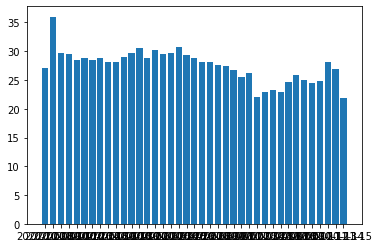

In [57]:
plt.bar(x='Date',height='temp',data=Givatayim_df)

## Transpose of the data frame

In [58]:
Givatayim_df_by_dt= Givatayim_df.T
Givatayim_df_by_dt.head()

,0,1,2,3,4,5,6,7,8,9,...,5634,5635,5636,5637,5638,5639,5640,5641,5642,5643
dt,1602184088,1602186198,1602189626,1602189641,1602189917,1602190821,1602191699,1602192624,1602193241,1602194398,...,1605430817,1605431661,1605432617,1605433426,1605434382,1605435095,1605436055,1605437117,1605437789,1605438918
temp,27.14,26.78,25.71,25.71,25.72,25.54,25.53,25.18,25,24.74,...,20.18,20.36,21.26,21.44,21.6,21.79,21.79,21.79,21.6,21.6
temp_min,26.67,26.11,25,25,25,25,25,24,24,24,...,20,20,21,21,21.11,21.67,21.67,21.67,20.56,20
temp_max,27.78,27.22,26.67,26.67,26.67,26.11,26.11,26.11,26.11,25.56,...,20.56,20.56,21.67,21.67,22,22,22,22,23,23
pressure,1012,1011,1011,1011,1011,1011,1011,1011,1011,1011,...,1016,1016,1016,1016,1016,1016,1015,1015,1015,1015


In [59]:
# Givatayim_df_by_dt = pd.melt(Givatayim_df_by_dt, id_vars=['dt'])
# Givatayim_df_by_dt.head()

## correlations

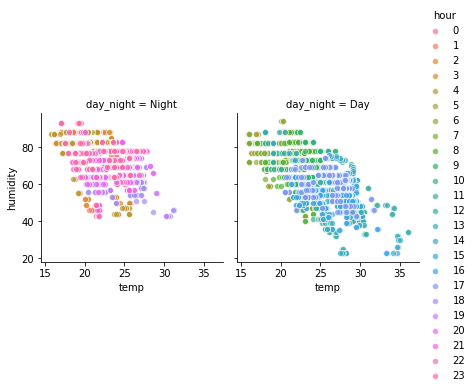

In [60]:
from scipy.stats.stats import pearsonr
g = sns.FacetGrid(Givatayim_df, col="day_night", hue="hour")
g.map(sns.scatterplot, "temp", "humidity", alpha=.7)
g.add_legend()

# sns.scatterplot('temp', 'pressure', data = Givatayim_df)
# plt.show()



In [61]:
print('Pearson r correlation between temp and humidity: %.2f' % pearsonr(Givatayim_df['temp'], Givatayim_df['humidity'])[0])

Pearson r correlation between temp and humidity: -0.65


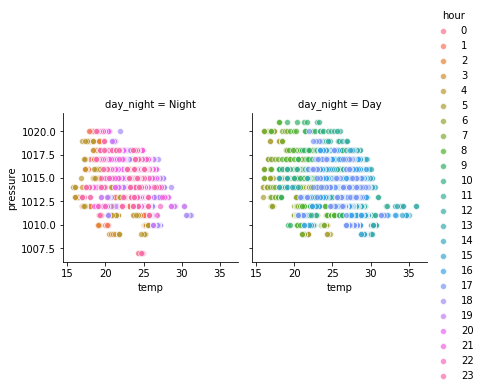

In [62]:
g = sns.FacetGrid(Givatayim_df, col="day_night", hue="hour")
g.map(sns.scatterplot, "temp", "pressure", alpha=.7)
g.add_legend()

In [63]:
print('Pearson r correlation between temp and pressure: %.2f' % pearsonr(Givatayim_df['temp'], Givatayim_df['pressure'])[0])

Pearson r correlation between temp and pressure: -0.30


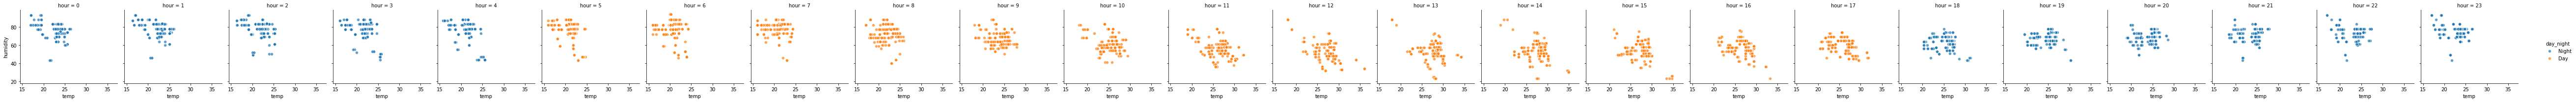

In [64]:
g = sns.FacetGrid(Givatayim_df, col="hour", hue="day_night")
g.map(sns.scatterplot, "temp", "humidity", alpha=.7)
g.add_legend()

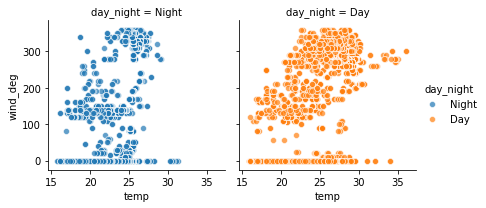

In [65]:
g = sns.FacetGrid(Givatayim_df, col="day_night", hue="day_night")
g.map(sns.scatterplot, "temp", "wind_deg", alpha=.7)
g.add_legend()

In [66]:
print('Pearson r correlation between temp and wind_deg: %.2f' % pearsonr(Givatayim_df['temp'], Givatayim_df['wind_deg'])[0])

Pearson r correlation between temp and wind_deg: 0.52


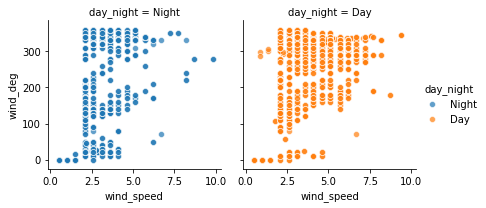

In [67]:
g = sns.FacetGrid(Givatayim_df, col="day_night", hue="day_night")
g.map(sns.scatterplot, "wind_speed", "wind_deg", alpha=.7)
g.add_legend()

In [68]:
print('Pearson r correlation between wind_speed and wind_deg: %.2f' % pearsonr(Givatayim_df['wind_speed'], Givatayim_df['wind_deg'])[0])

Pearson r correlation between wind_speed and wind_deg: 0.77


In [69]:
# import Givatayim_df 
Givatayim_df.to_pickle("Givatayim_df.pkl")